In [1]:
# Importing Libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns',150)
pd.set_option('display.max_info_columns', 150)
pd.set_option('display.max_rows',150)

## 1. Importing Datasets

In [3]:
# Loading pplication_data  datasets
app_data = pd.read_csv('application_data.csv')

## 2. Understanding Data

In [4]:
# Display top 5 rows of app_data dataframe
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
# Printing shape of application_data dataset
print(f'Shape of app_data : {app_data.shape}')

Shape of app_data : (307511, 122)


In [6]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nu

> app_data.info() only showing data types of columns. No info about null_values, lets use describe fn. to get some more insight

In [7]:
app_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

>Some columns of applition_dataset also have null values as count values are different

## 3. Data Preprocessing (Cleaning and Fixing Data)

###### For app_data dataframe

In [8]:
# Removing Unwanted Col.
unwanted_col=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE',
        'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','EXT_SOURCE_2','EXT_SOURCE_3']
app_data.drop(unwanted_col, inplace=True, axis=1)

In [9]:
# Column wise Null percentage in app_data
null_percentage_app = round(app_data.isnull().sum()/app_data.shape[0]*100, 2)
print(null_percentage_app)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
OCCUPATION_TYPE                 31.35
WEEKDAY_APPR_PROCESS_START       0.00
HOUR_APPR_PROCESS_START          0.00
REG_REGION_NOT_LIVE_REGION       0.00
REG_REGION_N

In [10]:
# Getting list of columns which have more than or equal to 45% missing values
app_colToDrop = list(null_percentage_app[null_percentage_app >= 45].index)

In [11]:
print(f'No. of col. to be drop: {len(app_colToDrop)}')
app_colToDrop

No. of col. to be drop: 49


['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'TOTALAREA_MOD

In [12]:
# Dropping Columns having more than 45% of missing values
app_data.drop(app_colToDrop, axis= 1, inplace=True)

In [13]:
# Rechecking column wise Null percentage in app_data
null_percentage_app = round(app_data.isnull().sum()/app_data.shape[0]*100, 2)
print(null_percentage_app)
print(f'New shape of app_data: {app_data.shape}')

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
OCCUPATION_TYPE                31.35
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
REG_REGION_NOT_LIVE_REGION      0.00
REG_REGION_NOT_WORK_REGION      0.00
LIVE_REGION_NOT_WORK_REGION     0.00
R

In [14]:
# Getting columns with missing values between 0% and 45%
missing_value_col_app = list((null_percentage_app[null_percentage_app > 0].index))
missing_value_col_app

['AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'OCCUPATION_TYPE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64


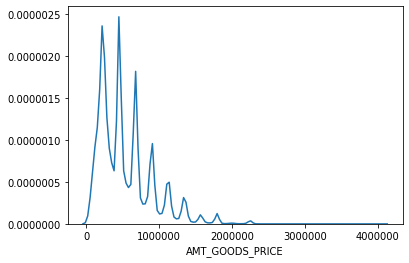

In [15]:
print(app_data.AMT_GOODS_PRICE.describe())
sns.distplot(app_data.AMT_GOODS_PRICE, hist=False)

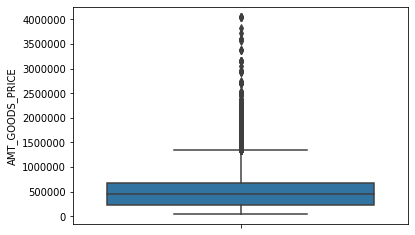

In [16]:
sns.boxplot(y = app_data.AMT_GOODS_PRICE)

> AMT_GOODS_PRICE represents price of goods for which loans has been taken, which can be an important metric for identifying Defaulters. This col. shows high standard deviation and has multi-modal distribution curve, is left-skewed and contain outliers that can be seen in the boxplot . 

> For this col. **median is ideally** suited but it is only 0.09% so, I would recommend **removing rows with missing values**.

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64


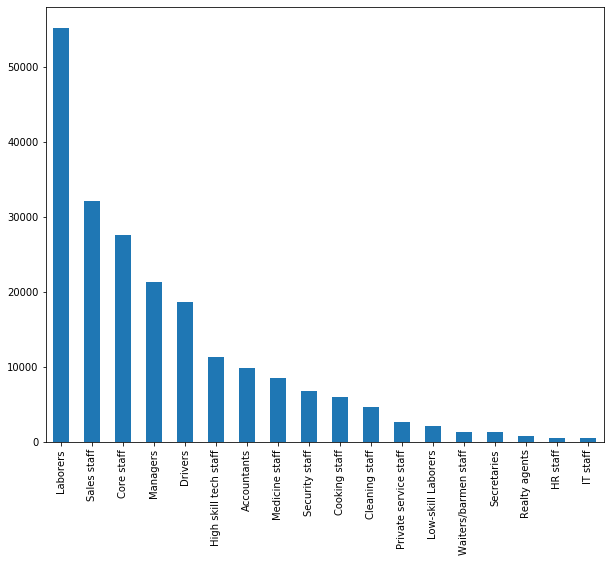

In [17]:
print(app_data.OCCUPATION_TYPE.value_counts())
app_data.OCCUPATION_TYPE.value_counts().plot(kind ='bar', figsize = (10,8))

> OCCUPATION_TYPE is a important col. and it is a categoriacal value with around 31.35 % missing value. So, ideally we replace it with **mode or most frequent** category but in this analysis the best step will be to **remove the rows having missing values** in occupation_type. As Occupation plays major role in defaulting or not.

In [18]:
# print(app_data.EXT_SOURCE_3.describe())
# sns.boxplot(y = app_data.EXT_SOURCE_3)

In [19]:
# sns.distplot(app_data.EXT_SOURCE_3, hist= False)

> Recommendation to use **Mean** to impute missing values of EXT_SOURCE_3 as there are not 

In [20]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 37 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 


AMT_REQ_CREDIT_BUREAU_HOUR
No. of unique values: 5
0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

AMT_REQ_CREDIT_BUREAU_DAY
No. of unique values: 9
0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

AMT_REQ_CREDIT_BUREAU_WEEK
No. of unique values: 9
0.0    257456
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

AMT_REQ_CREDIT_BUREAU_MON
No. of unique values: 24
0.0     222233
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
27.0         1
2

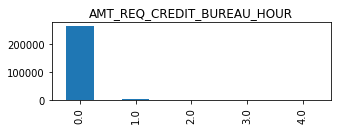

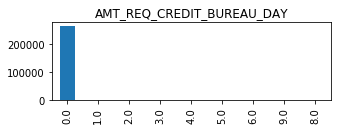

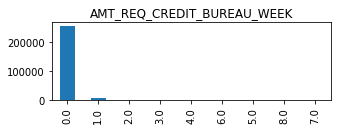

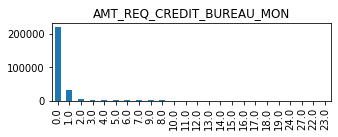

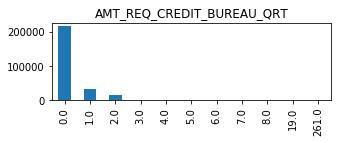

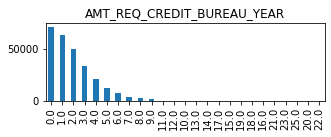

In [21]:

Amt_req_credit = list(enumerate(missing_value_col_app[-6:]))
for i in Amt_req_credit:
    print('\n'+i[1])
    print(f'No. of unique values: {app_data[i[1]].nunique()}')
    print(app_data[i[1]].value_counts())
    plt.figure(figsize=(5,10))
    plt.subplot(len(Amt_req_credit), 1, i[0]+1 )
    plt.title(i[1])
    app_data[i[1]].value_counts().plot(kind= 'bar')

> Use **Mode** to impute missing value in these col. 
('AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR')
 as they are categorical columns

### Checking Data and DataTypes of the Columns

In [22]:
app_data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,Laborers,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,MONDAY,11,0,0,0,0,0,0,School,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,Laborers,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,Laborers,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,Core staff,THURSDAY,11,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,Sales staff,THURSDAY,15,0,0,0,0,0,0,Services,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,-20775,365243,-4388.0,-4090,NaN,MONDAY,8,0,0,0,0,0,0,XNA,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002,-14966,-7921,-6737.0,-5150,Managers,THURSDAY,9,0,0,0,0,1,1,School,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.005313,-11961,-4786,-2562.0,-931,Laborers,WEDNESDAY,9,0,0,0,1,1,0,Business Entity Type 1,0.0,0.0,0.0,0.0,0.0,0.0


###### > Fixing Days_Employed Col

In [23]:
app_data.DAYS_EMPLOYED.value_counts()

 365243    55374
-200         156
-224         152
-199         151
-230         151
           ...  
-11115         1
-11371         1
-11883         1
-13536         1
-8795          1
Name: DAYS_EMPLOYED, Length: 12574, dtype: int64

> First value i.e 365243 DAYS ~= 1000.years which is not possible. So, we replace it with 0

In [24]:
app_data.DAYS_EMPLOYED.replace(365243, 0, inplace= True)

In [25]:
app_data.DAYS_EMPLOYED = -1*app_data.DAYS_EMPLOYED

In [26]:
app_data.DAYS_EMPLOYED.value_counts()

0        55376
200        156
224        152
230        151
199        151
         ...  
12276        1
7265         1
9062         1
10855        1
13673        1
Name: DAYS_EMPLOYED, Length: 12573, dtype: int64

In [27]:
# Checking ORGANIZATION_TYPE col
app_data.ORGANIZATION_TYPE.value_counts(normalize = True)*100

Business Entity Type 3    22.110429
XNA                       18.007161
Self-employed             12.491260
Other                      5.425172
Medicine                   3.639870
Business Entity Type 2     3.431747
Government                 3.383294
School                     2.891929
Trade: type 7              2.546576
Kindergarten               2.237318
Construction               2.185613
Business Entity Type 1     1.945947
Transport: type 4          1.755384
Trade: type 3              1.135569
Industry: type 9           1.095245
Industry: type 3           1.065978
Security                   1.055897
Housing                    0.961917
Industry: type 11          0.879318
Military                   0.856555
Bank                       0.815255
Agriculture                0.798020
Police                     0.761274
Transport: type 2          0.716722
Postal                     0.701438
Security Ministries        0.641928
Trade: type 2              0.617864
Restaurant                 0

> We can see that **'XNA'** value which to our knowledge represents **'Not Available'** can be also treated as invalid or missing value. This is 18% of total rows which we can **remove from our analysis**.

In [28]:
# Removing XNA rows from the CODE_GENDER.
app_data.drop(app_data[app_data.ORGANIZATION_TYPE == 'XNA'].index, axis=0, inplace=True)
app_data.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transport: type 3          1187
Industry

In [29]:
# Checking ORGANIZATION_TYPE col
app_data.CODE_GENDER.value_counts(normalize = True)*100

F      62.337935
M      37.660478
XNA     0.001586
Name: CODE_GENDER, dtype: float64

> We can see that **'XNA'** value which to our knowledge represents **'Not Available'** can be also treated as invalid or missing value. This is 0.0013% of total rows which we will **remove from our analysis**.

In [30]:
# Removing XNA rows from the CODE_GENDER.
app_data.drop(app_data[app_data.CODE_GENDER == 'XNA'].index, axis=0, inplace=True)
app_data.CODE_GENDER.value_counts()

F    157177
M     94956
Name: CODE_GENDER, dtype: int64

In [31]:
# Defining fun. to fix other col.
Other_colToFix = ['DAYS_BIRTH','DAYS_ID_PUBLISH','DAYS_REGISTRATION']
def fixCol(arr):
    for i in arr:
        app_data[i] = -1 * app_data[i]
        print('\n'+i)
        print(app_data[i].value_counts())

In [32]:
fixCol(Other_colToFix)


DAYS_BIRTH
13749    43
13481    42
10020    41
18248    41
10292    40
         ..
23436     1
7829      1
23650     1
23906     1
7868      1
Name: DAYS_BIRTH, Length: 16513, dtype: int64

DAYS_ID_PUBLISH
4032    112
4166    112
4053    111
4256    110
4214    110
       ... 
5945      1
6136      1
5924      1
7197      1
5898      1
Name: DAYS_ID_PUBLISH, Length: 6140, dtype: int64

DAYS_REGISTRATION
1.0        91
6.0        84
2.0        82
7.0        81
4.0        78
           ..
16167.0     1
15463.0     1
12624.0     1
15630.0     1
14818.0     1
Name: DAYS_REGISTRATION, Length: 14419, dtype: int64


In [33]:
# Casting all other columns data type to numeric data type

num_col=['TARGET',
          'CNT_CHILDREN',
          'AMT_INCOME_TOTAL',
          'AMT_CREDIT','AMT_ANNUITY',
          'REGION_POPULATION_RELATIVE','DAYS_BIRTH',
          'DAYS_EMPLOYED',
          'DAYS_REGISTRATION',
          'DAYS_ID_PUBLISH',
          'HOUR_APPR_PROCESS_START',
          'LIVE_REGION_NOT_WORK_REGION',
          'REG_CITY_NOT_LIVE_CITY',
          'REG_CITY_NOT_WORK_CITY',
          'LIVE_CITY_NOT_WORK_CITY']

app_data[num_col]=app_data[num_col].apply(pd.to_numeric)
app_data.head(5)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,MONDAY,11,0,0,0,0,0,0,School,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,Laborers,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,Core staff,THURSDAY,11,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,0.0,0.0


#### Finding Outliers for Numerical Col

In [34]:
For_Outliers = list(enumerate(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']))

In [35]:
for i in For_Outliers:
    print('\n'+i[1])
    print('-'*30)
    print(app_data[i[1]].describe())


AMT_INCOME_TOTAL
------------------------------
count    2.521330e+05
mean     1.759139e+05
std      2.588536e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.575000e+05
75%      2.115000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

AMT_CREDIT
------------------------------
count    2.521330e+05
mean     6.114018e+05
std      4.065294e+05
min      4.500000e+04
25%      2.779695e+05
50%      5.212800e+05
75%      8.292240e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

AMT_ANNUITY
------------------------------
count    252121.000000
mean      27812.449610
std       14647.829516
min        1980.000000
25%       17073.000000
50%       25834.500000
75%       35617.500000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

AMT_GOODS_PRICE
------------------------------
count    2.518770e+05
mean     5.494077e+05
std      3.732695e+05
min      4.050000e+04
25%      2.475000e+05
50%      4.500000e+05
75%      6.930000e+05
max      4.050000e+0

> 1. For AMT_INCOME_TOTAL: There is lot of variation from 75% to max. So, this column is highly probale of having outliers, which can be confirmed using boxplot later.

> 2. For AMT_CREDIT: There is considerable amt. of variation in different quartiles of data, but describe fn. doesn't give clear repersentation about outliers in this col.. We need to use boxplot for that.

> 3. For AMT_ANNUITY : This col. has large amt. of variation in the last quartile which shows that this col. is suffering from outliers, which can be confirm by box plot later.

> 4. For AMT_GOODS_PRICE : In this col. describe fn. does not give any strong information about outliers in the col.

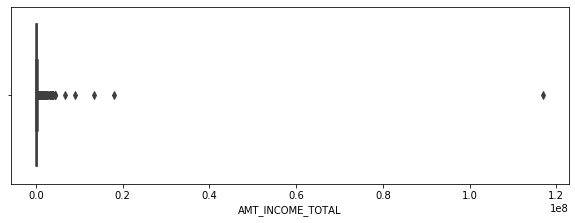

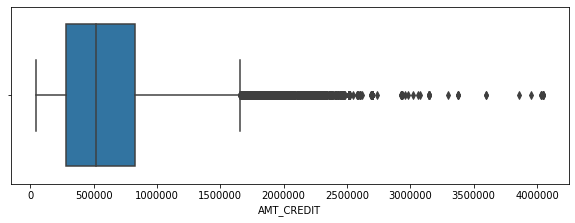

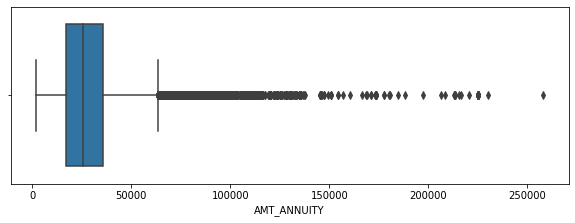

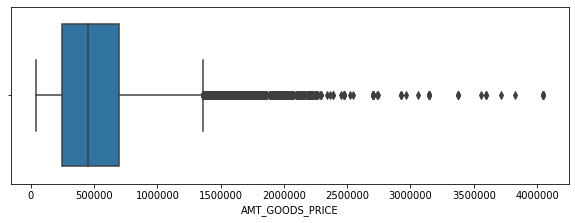

In [36]:
for i in For_Outliers:
    plt.figure(figsize=(10,15))
    plt.subplot(len(For_Outliers), 1, i[0]+1)
    sns.boxplot(app_data[i[1]])

> 1. For AMT_INCOME_TOTAL: This col. has outlier as we can clearly see a single point on extreme right in its respective boxplot. We can remove these.

In [37]:
app_data.AMT_CREDIT.quantile([0.5, 0.8, 0.85, 0.9, 0.95, 0.97, 0.99,1])

0.50     521280.0
0.80     904500.0
0.85    1042560.0
0.90    1170000.0
0.95    1350000.0
0.97    1546020.0
0.99    1886850.0
1.00    4050000.0
Name: AMT_CREDIT, dtype: float64

In [38]:
app_data[app_data.AMT_CREDIT > 1200000].AMT_CREDIT.describe()

count    2.390200e+04
mean     1.496865e+06
std      2.975331e+05
min      1.200429e+06
25%      1.288350e+06
50%      1.350639e+06
75%      1.579478e+06
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

> 2. For AMT_CREDIT: This col. has some outliers but they are significant for our analysis. There is large variation in 99% and max value. Here we can **Cap the outliers** to some value.

In [39]:
app_data.AMT_ANNUITY.quantile([0.5, 0.8, 0.85, 0.9, 0.95, 0.97, 0.99, 1])

0.50     25834.5
0.80     38155.5
0.85     41791.5
0.90     46701.0
0.95     53712.0
0.97     59431.5
0.99     71095.5
1.00    258025.5
Name: AMT_ANNUITY, dtype: float64

In [40]:
app_data[app_data.AMT_ANNUITY > 60000].AMT_ANNUITY.describe()

count      7171.000000
mean      73292.137568
std       17888.969562
min       60012.000000
25%       62964.000000
50%       67513.500000
75%       74772.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

> 3. For AMT_ANNUITY : For this col. majority distribution is smooth but there are certain outliers in the last 1%. The **best is to remove the extreme values and cap rest**.

In [41]:
app_data.AMT_GOODS_PRICE.quantile([0.5, 0.8, 0.85, 0.9, 0.95, 0.97, 0.99, 1])

0.50     450000.0
0.80     873000.0
0.85     900000.0
0.90    1125000.0
0.95    1332000.0
0.97    1354500.0
0.99    1800000.0
1.00    4050000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [42]:
app_data[app_data.AMT_GOODS_PRICE > 1800000].AMT_GOODS_PRICE.dropna().describe()

count    1.280000e+03
mean     2.185783e+06
std      2.721742e+05
min      1.804500e+06
25%      2.025000e+06
50%      2.250000e+06
75%      2.250000e+06
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

> 4. For AMT_GOODS_PRICE : For this col. majority distribution is smooth but there are certain outliers in the last 1%. The best is **to remove the extreme values and cap rest**.

#### Binning

In [43]:
# Creating bins for AMT_INCOME_TOTAL
bins = [0,100000,200000,300000,400000,500000,600000,700000,800000, 900000, 1000000, 100000000]
slot = ['0-100000','100000-200000','200000-300000','300000-400000','400000-500000','500000-600000',
        '600000-700000','700000-800000','800000-900000','900000-1000000', '1000000 +']

app_data['AMT_INCOME_RANGE']=pd.cut(app_data['AMT_INCOME_TOTAL'], bins, labels=slot)

In [44]:
app_data['AMT_INCOME_RANGE'].value_counts

<bound method IndexOpsMixin.value_counts of 0         200000-300000
1         200000-300000
2              0-100000
3         100000-200000
4         100000-200000
              ...      
307504    100000-200000
307506    100000-200000
307508    100000-200000
307509    100000-200000
307510    100000-200000
Name: AMT_INCOME_RANGE, Length: 252133, dtype: category
Categories (11, object): [0-100000 < 100000-200000 < 200000-300000 < 300000-400000 ... 700000-800000 < 800000-900000 < 900000-1000000 < 1000000 +]>

In [45]:
# Creating bins for AMT_CREDIT

bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

app_data['AMT_CREDIT_RANGE']=pd.cut(app_data['AMT_CREDIT'], bins=bins, labels=slots)

In [46]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_CREDIT_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.0,0.0,0.0,0.0,0.0,1.0,200000-300000,400000-450000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,MONDAY,11,0,0,0,0,0,0,School,0.0,0.0,0.0,0.0,0.0,0.0,200000-300000,900000 and above
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,0.0,0.0,0-100000,0-150000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,Laborers,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,NaN,NaN,NaN,NaN,NaN,100000-200000,300000-350000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,Core staff,THURSDAY,11,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,0.0,0.0,100000-200000,500000-550000


## 4. Analysis 

0    91.339888
1     8.660112
Name: TARGET, dtype: float64


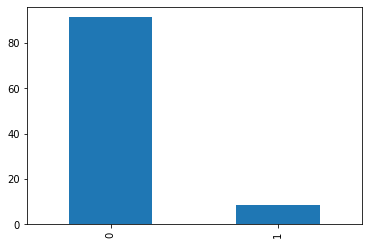

In [47]:
# Checking for Imbalance dataset w.r.t. TARGET col
value_Count_Target = app_data.TARGET.value_counts(normalize = True)*100
value_Count_Target.plot(kind= 'bar')
print(value_Count_Target)

> This is highly Imbalanced Dataset as approx. 92% data belong to target value of 0 and only approx. 8% belong to target value of 1

In [48]:
# Splitting dataset w.r.t Traget == 0 & Target == 1
Target_0 = app_data[app_data.TARGET == 0]
Target_1 = app_data[app_data.TARGET == 1]

In [49]:
Target_0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_CREDIT_RANGE
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,MONDAY,11,0,0,0,0,0,0,School,0.0,0.0,0.0,0.0,0.0,0.0,200000-300000,900000 and above
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,0.0,0.0,0-100000,0-150000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,Laborers,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,NaN,NaN,NaN,NaN,NaN,100000-200000,300000-350000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,Core staff,THURSDAY,11,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,0.0,0.0,100000-200000,500000-550000
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,16941,1588,4970.0,477,Laborers,WEDNESDAY,16,0,0,0,0,0,0,Other,0.0,0.0,0.0,0.0,1.0,1.0,0-100000,450000-500000


In [50]:
Target_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_CREDIT_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.0,0.0,0.0,0.0,0.0,1.0,200000-300000,400000-450000
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,18724,2628,6573.0,1827,Cooking staff,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.0,0.0,0.0,0.0,2.0,2.0,100000-200000,900000 and above
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,17482,1262,1182.0,1029,Laborers,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.0,0.0,0.0,2.0,0.0,4.0,200000-300000,900000 and above
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,13384,3597,45.0,4409,Sales staff,THURSDAY,11,0,0,0,0,0,0,Self-employed,0.0,0.0,0.0,0.0,0.0,2.0,100000-200000,250000-300000
94,100112,1,Cash loans,M,Y,Y,0,315000.0,953460.0,64107.0,900000.0,Family,Commercial associate,Incomplete higher,Single / not married,With parents,0.030755,10199,2015,4802.0,1038,NaN,SUNDAY,13,0,0,0,0,1,1,Industry: type 4,0.0,0.0,0.0,0.0,0.0,2.0,300000-400000,900000 and above


### Univariate Analysis for Categorical Variable

In [51]:
# Defining a function to plot the countplot for different categories
def UniVarCatPlot(title, hue = None, rotation=None, col_y = None, col_x = None):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 30
    plt.rcParams['axes.titlepad'] = 30
    
    if col_x:
        col_name = col_x
        plt.figure(figsize=(30,25))
    else:
        col_name = col_y
        plt.figure(figsize=(15,38))

    #   1st subplot for Target_1    
    plt.subplots_adjust(hspace=0.5)
    plt.subplot(2,1,1)
    
    title1 = title + ' for Target_0 (Client with NO Payment Difficulty)'
    plt.title(title1)

    #   Adjusting scale for horizonatl plot    
    if col_x:
        plt.yscale('log')
        plt.xticks(rotation = rotation)
    else:
        plt.xscale('log')
        plt.yticks(rotation = rotation)
        
    sns.countplot(data = Target_0, x = col_x, y = col_y, order=Target_0[col_name].value_counts().index, hue=hue, palette='dark')
    

    #   2nd subplot for Target_1
    plt.subplot(2,1,2)
    plt.xticks(rotation = rotation)
    title2 = title + ' for Target_1 (Client with Payment Difficulty)'
    plt.title(title2)

    #   Adjusting scale for horizonatl plot
    if col_x:
        plt.yscale('log')
        plt.xticks(rotation = rotation)
    else:
        plt.xscale('log')
        plt.yticks(rotation = rotation)
        
    sns.countplot(data = Target_1, x = col_x, y= col_y, order=Target_1[col_name].value_counts().index, hue=hue, palette='dark')
    plt.legend(loc = 'upper right', fontsize = 'large')
    plt.show()

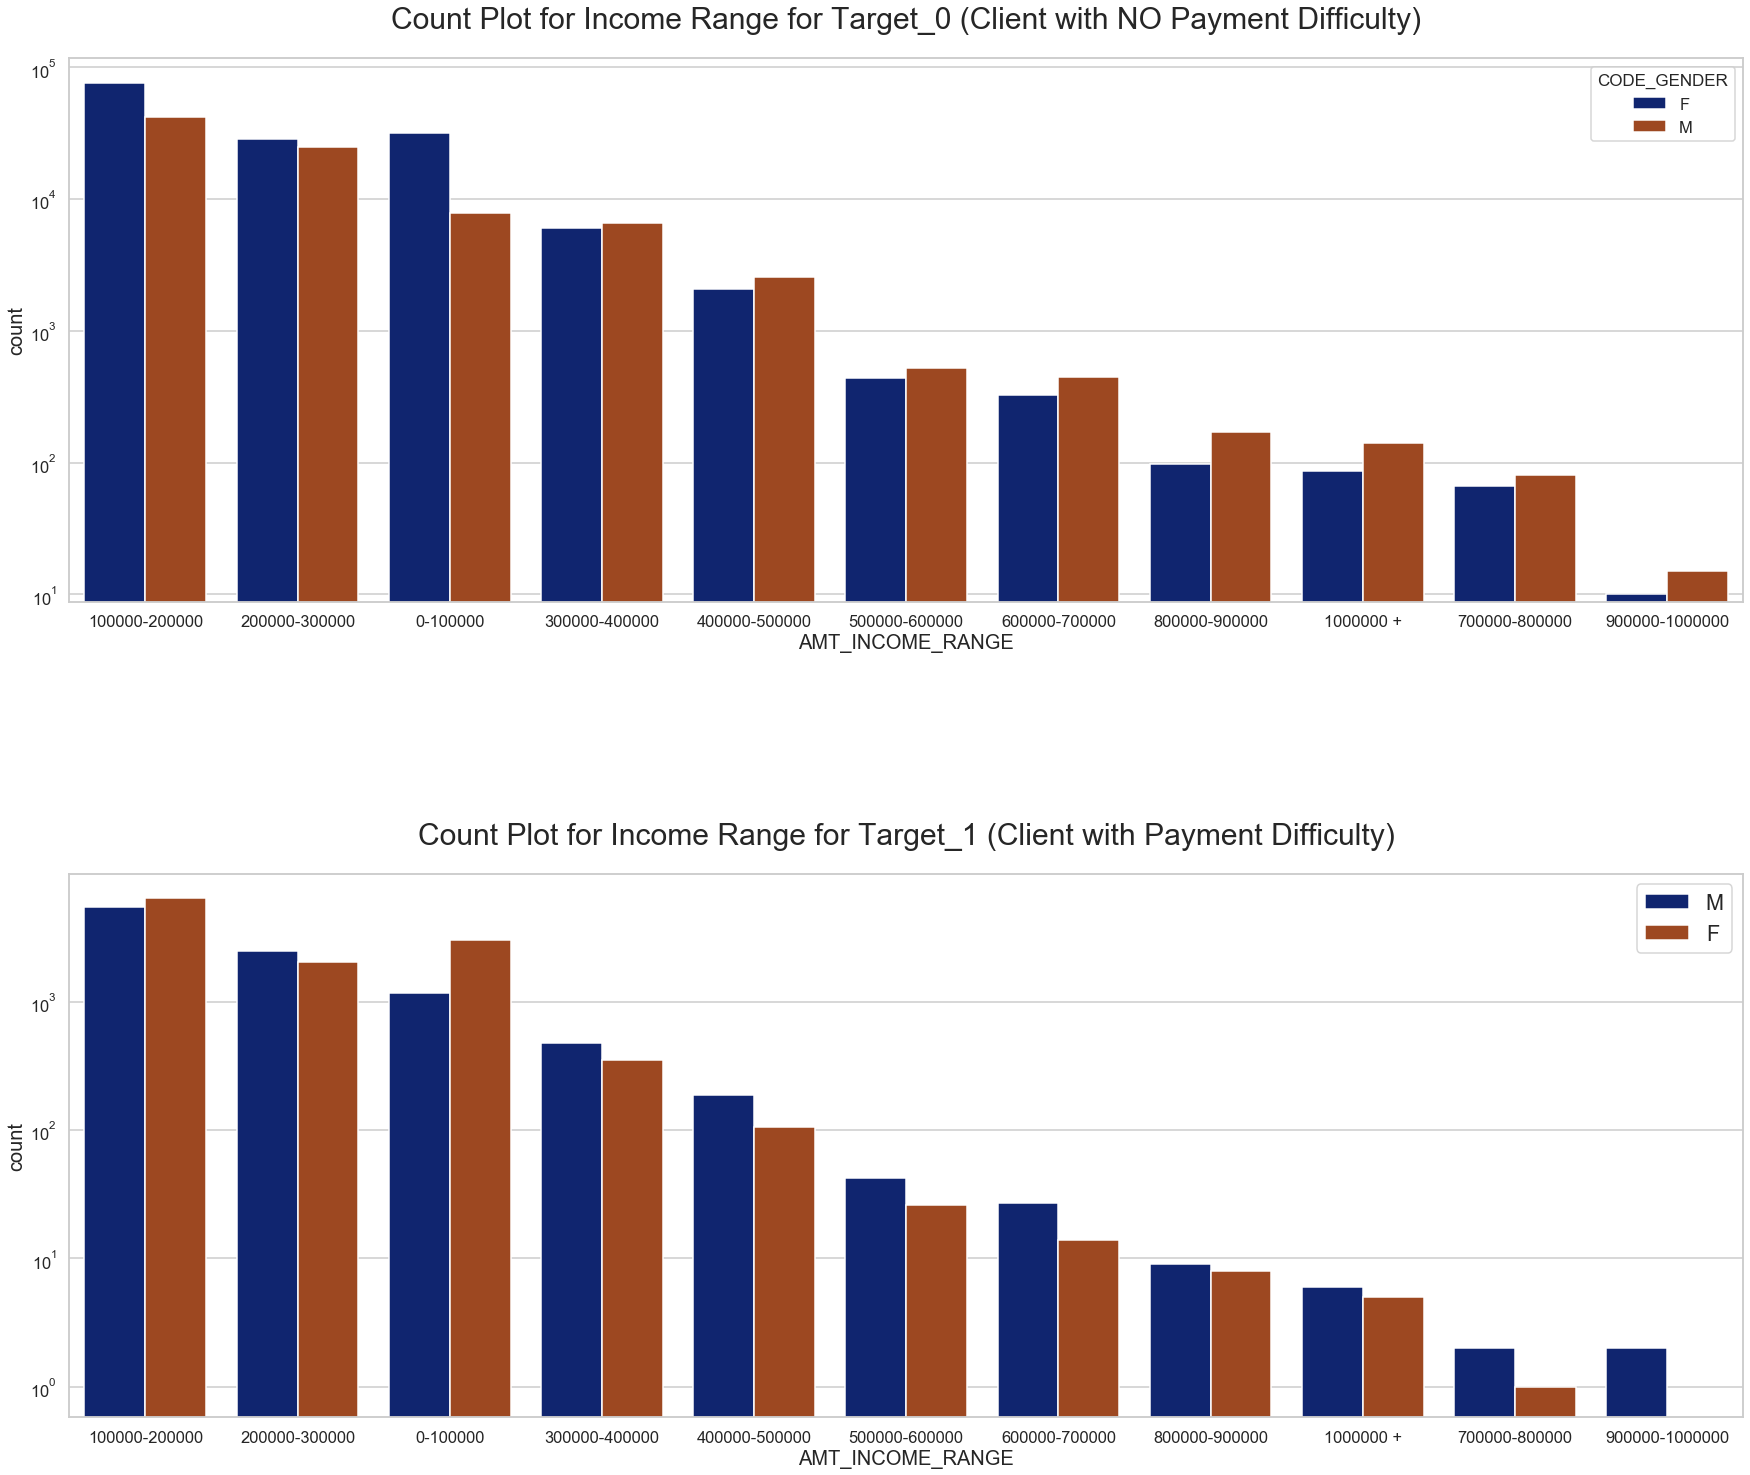

In [52]:
# Count plot for income range with wrt gender
UniVarCatPlot(col_x = 'AMT_INCOME_RANGE', title= 'Count Plot for Income Range', hue='CODE_GENDER')

> Observation from the count plot
    1. More female application for credit
    2. Majority of income range lies between 0 and 4,00,000
    3. Less count in 9,00,000 - 10,00,000. But sudden increase in count for 10,00,000+ interval.

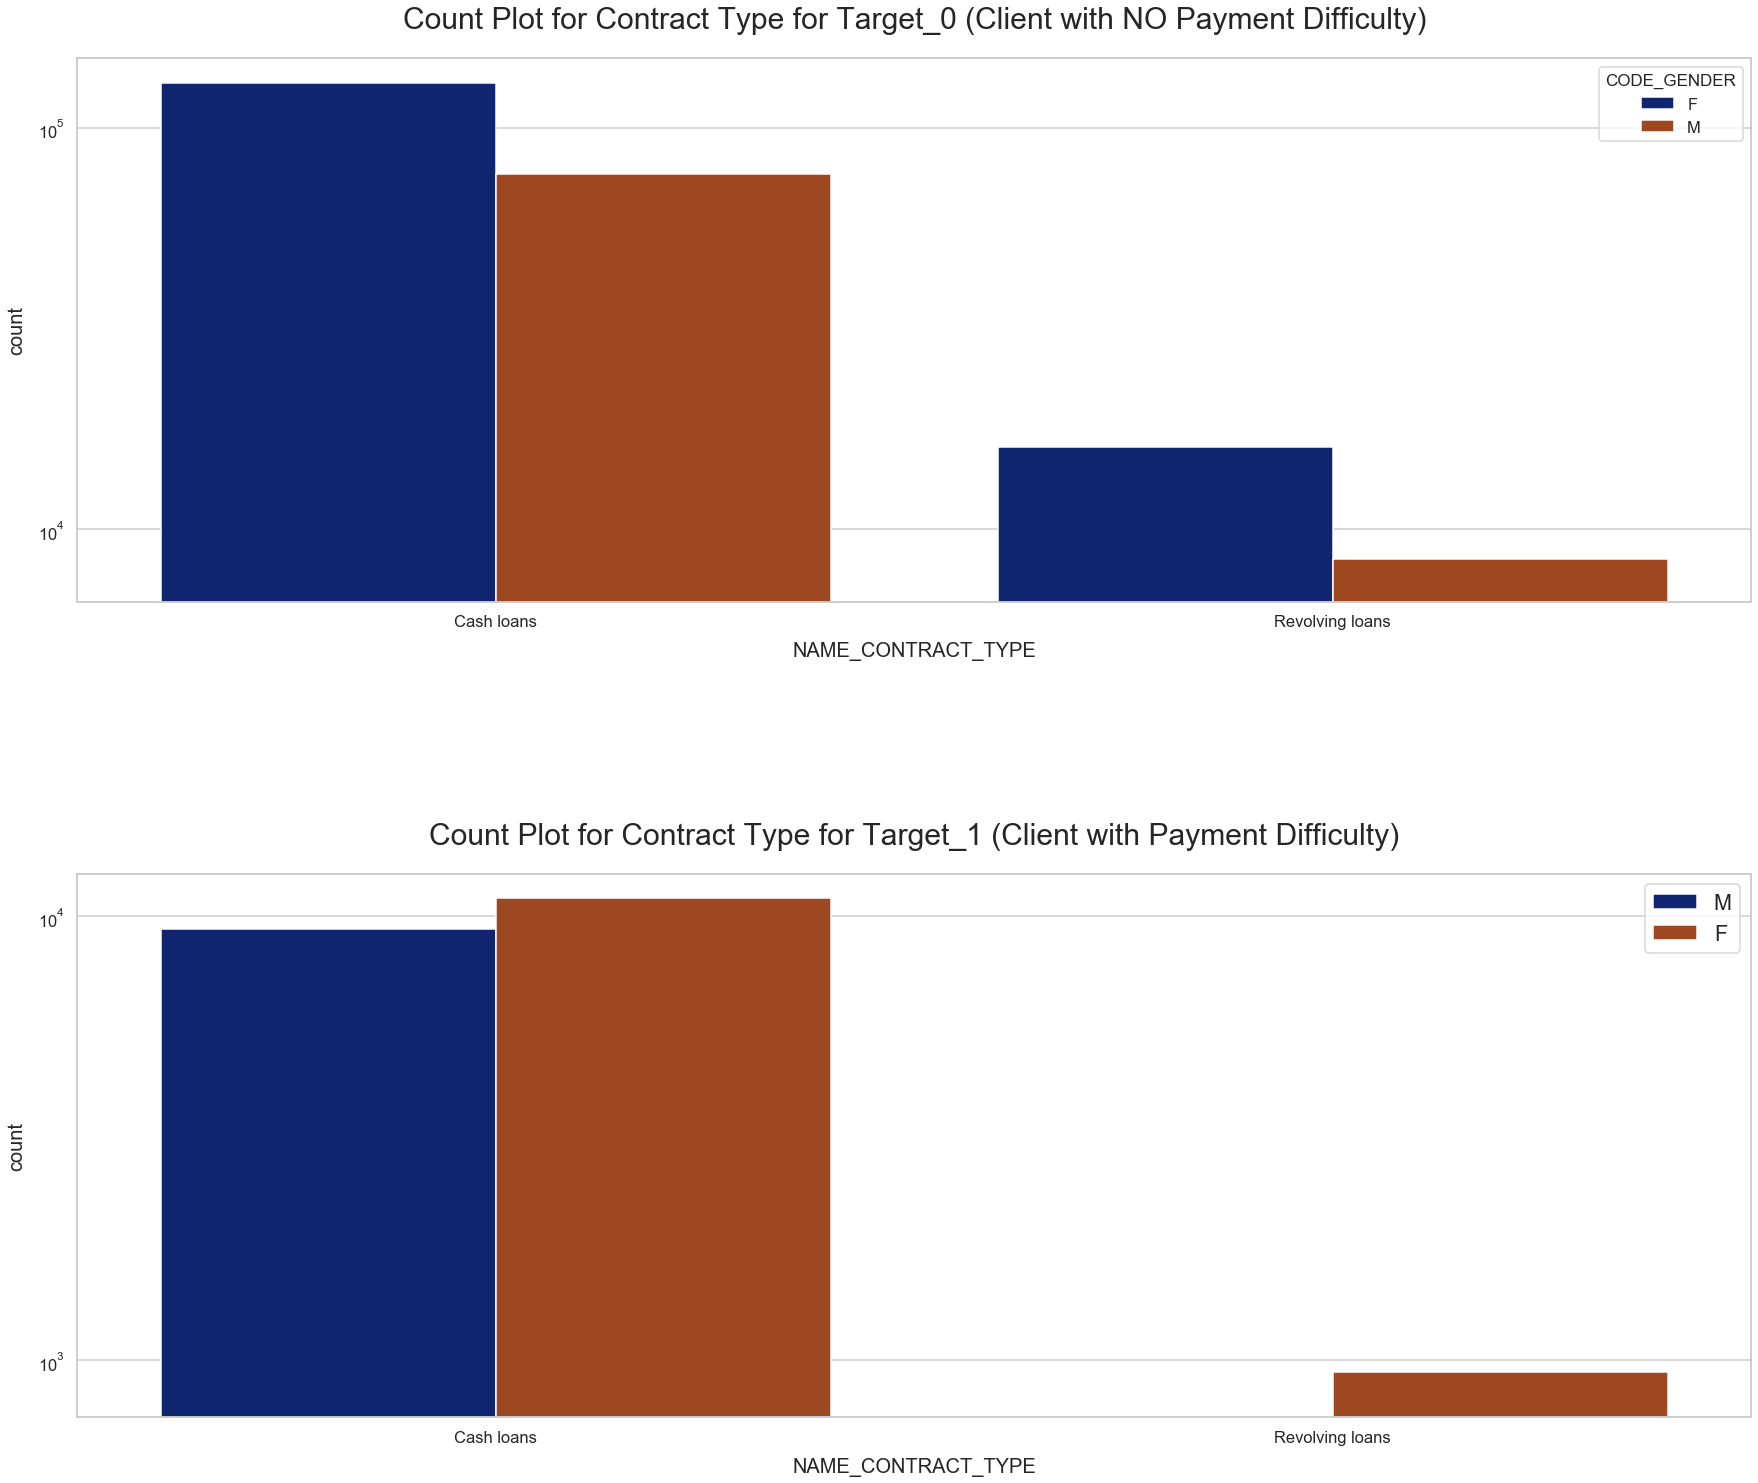

In [101]:
# Count Plot for contract type wrt gender
UniVarCatPlot(col_x = 'NAME_CONTRACT_TYPE', title= 'Count Plot for Contract Type', hue='CODE_GENDER')

For Target_0
> Count  for  contract type Cash loans is singnificantly higher than Revolving loans
> Females has higher count in this category.

For Target_1
> Count  for  contract type Cash loans is singnificantly higher than Revolving loans
> Females has higher count in this category, with no male in Revolving loans.


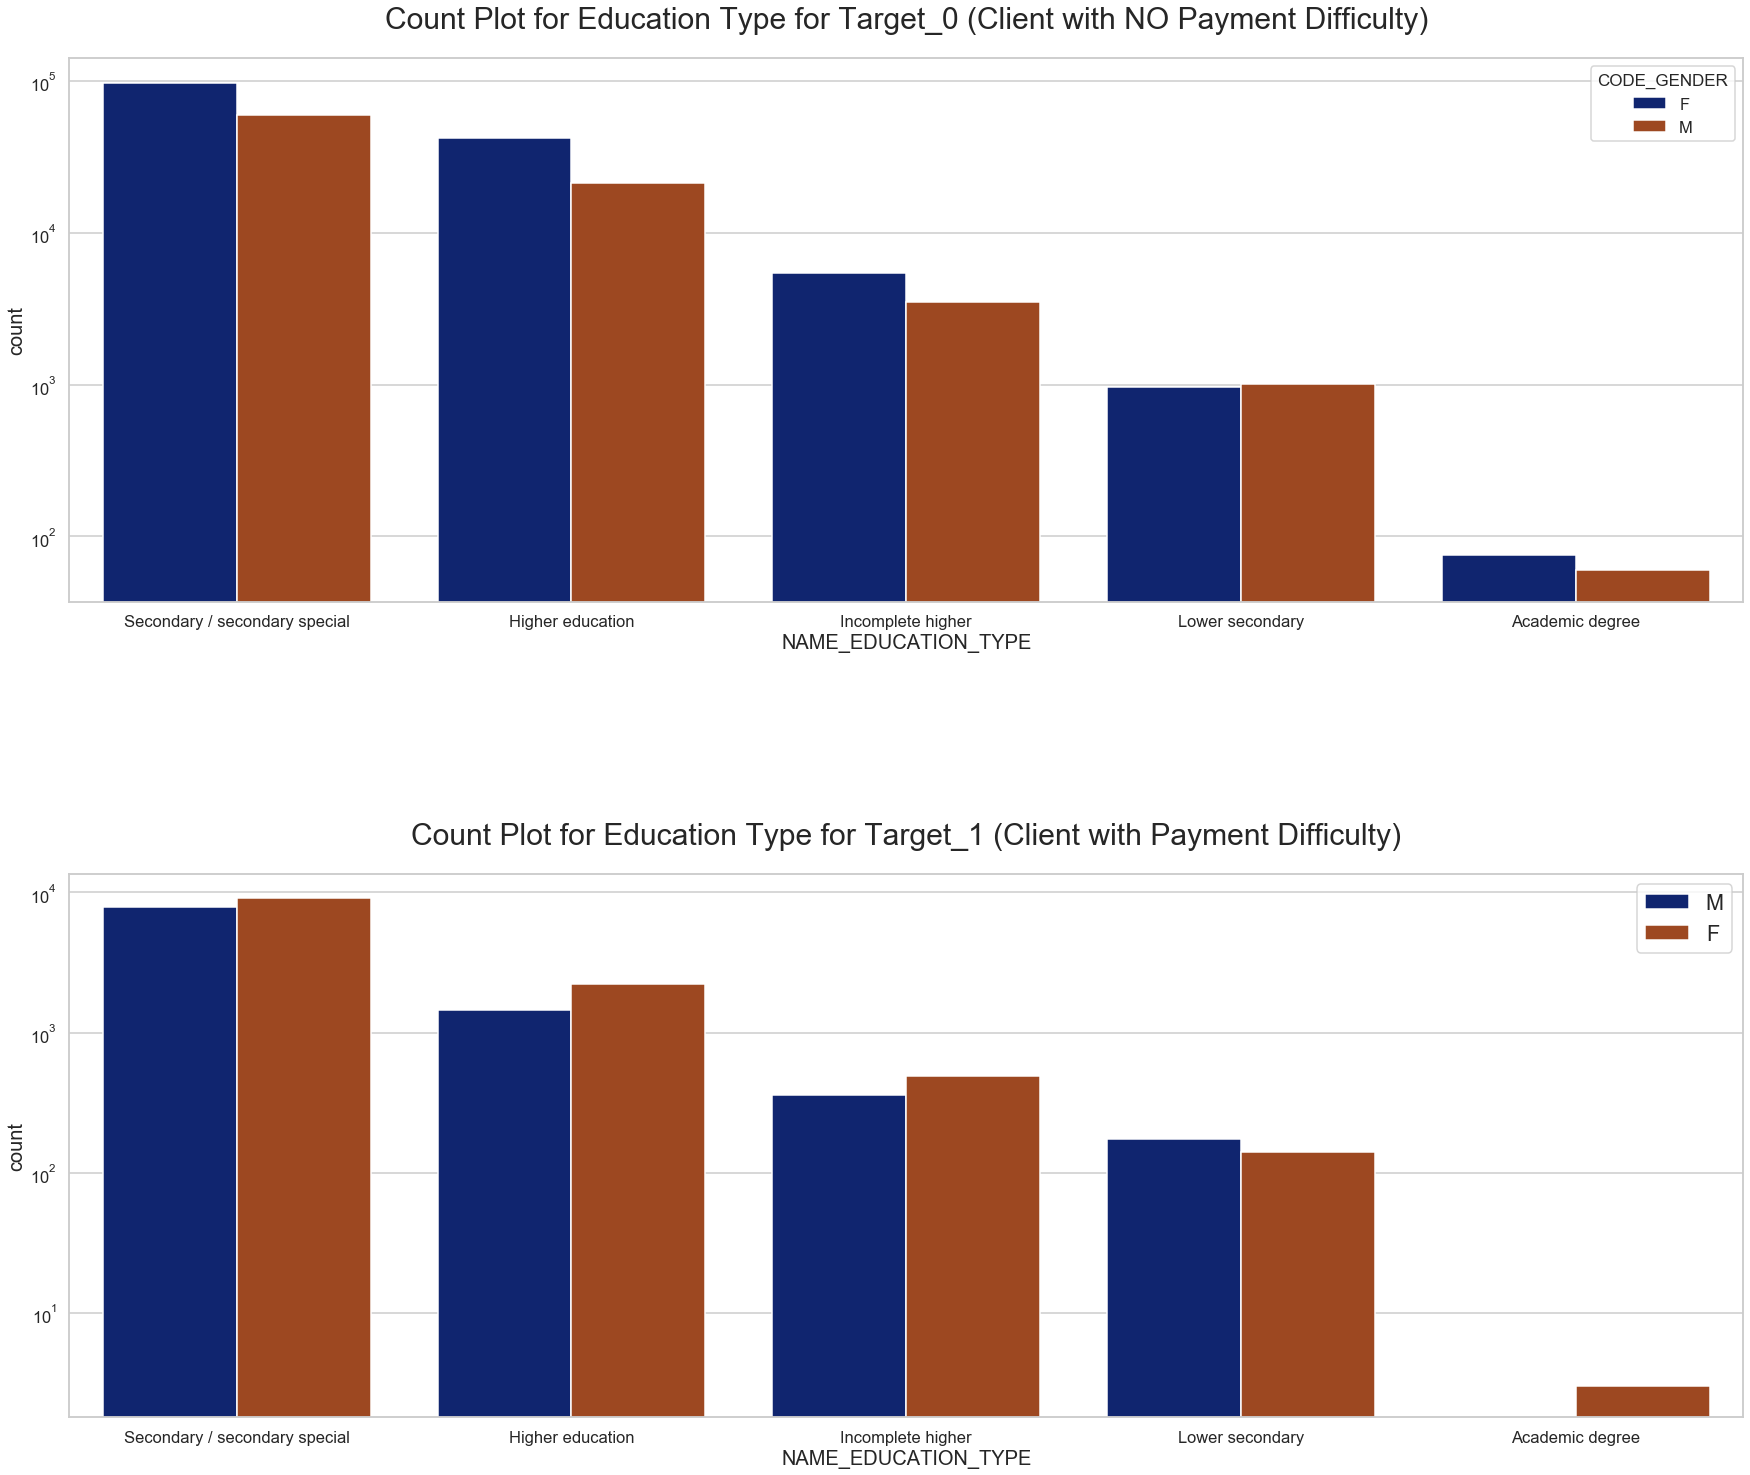

In [54]:
# Count Plot for type of education wrt gender
UniVarCatPlot(col_x = 'NAME_EDUCATION_TYPE', title= 'Count Plot for Education Type', hue='CODE_GENDER')

>For both Target_0 and Target_1 the count plot gives similar pattern with credit for Secondary Education type counts max.

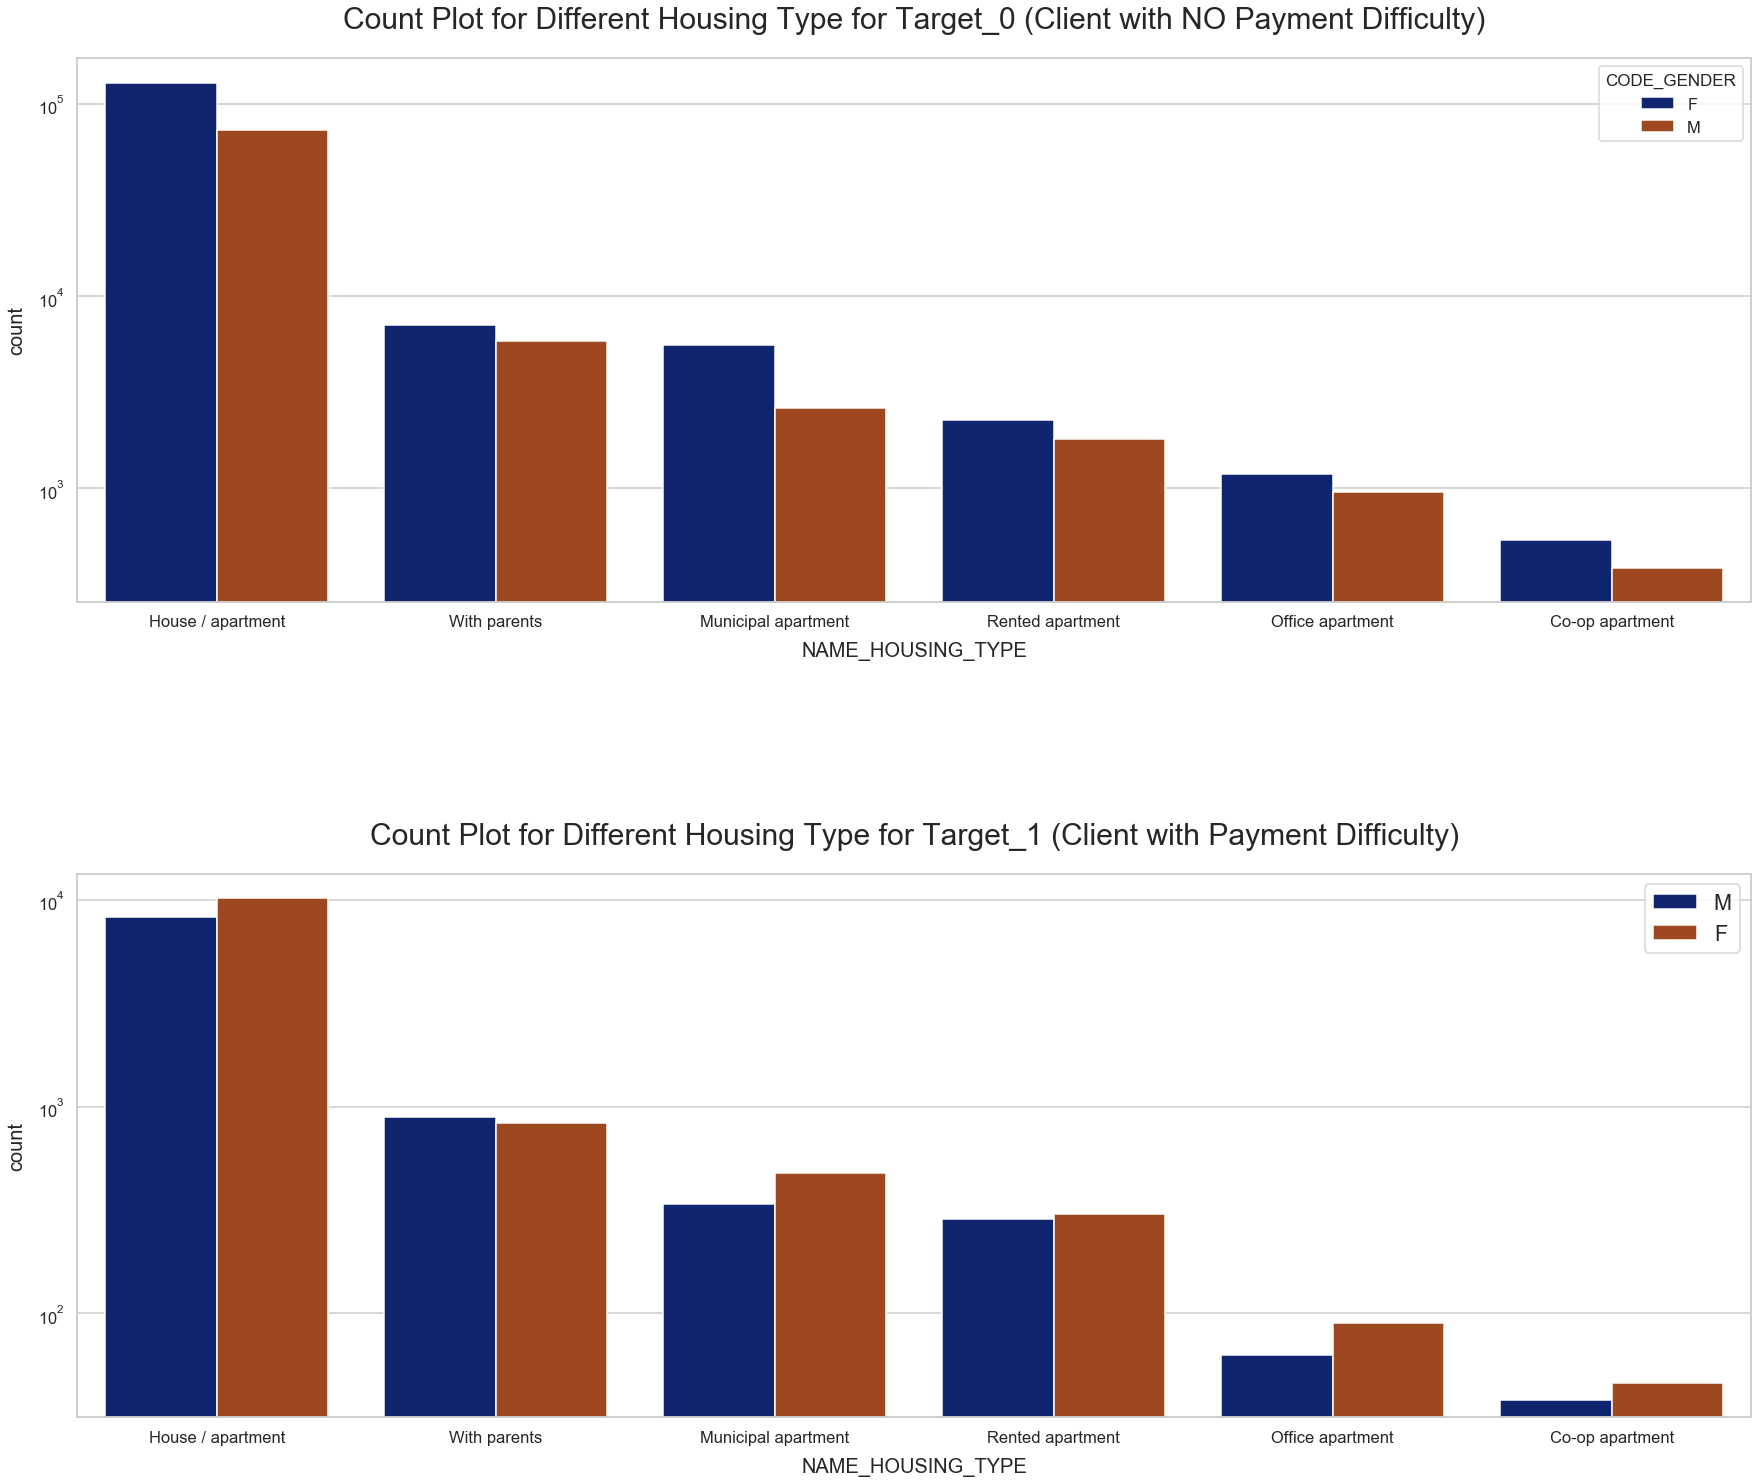

In [100]:
# Count Plot for cdifferent housing type
UniVarCatPlot(col_x = 'NAME_HOUSING_TYPE', title= 'Count Plot for Different Housing Type', hue='CODE_GENDER')

>For both Target_0 and Target_1 the count plot gives similar pattern with credit for House/apartment housing type counts max.

No handles with labels found to put in legend.


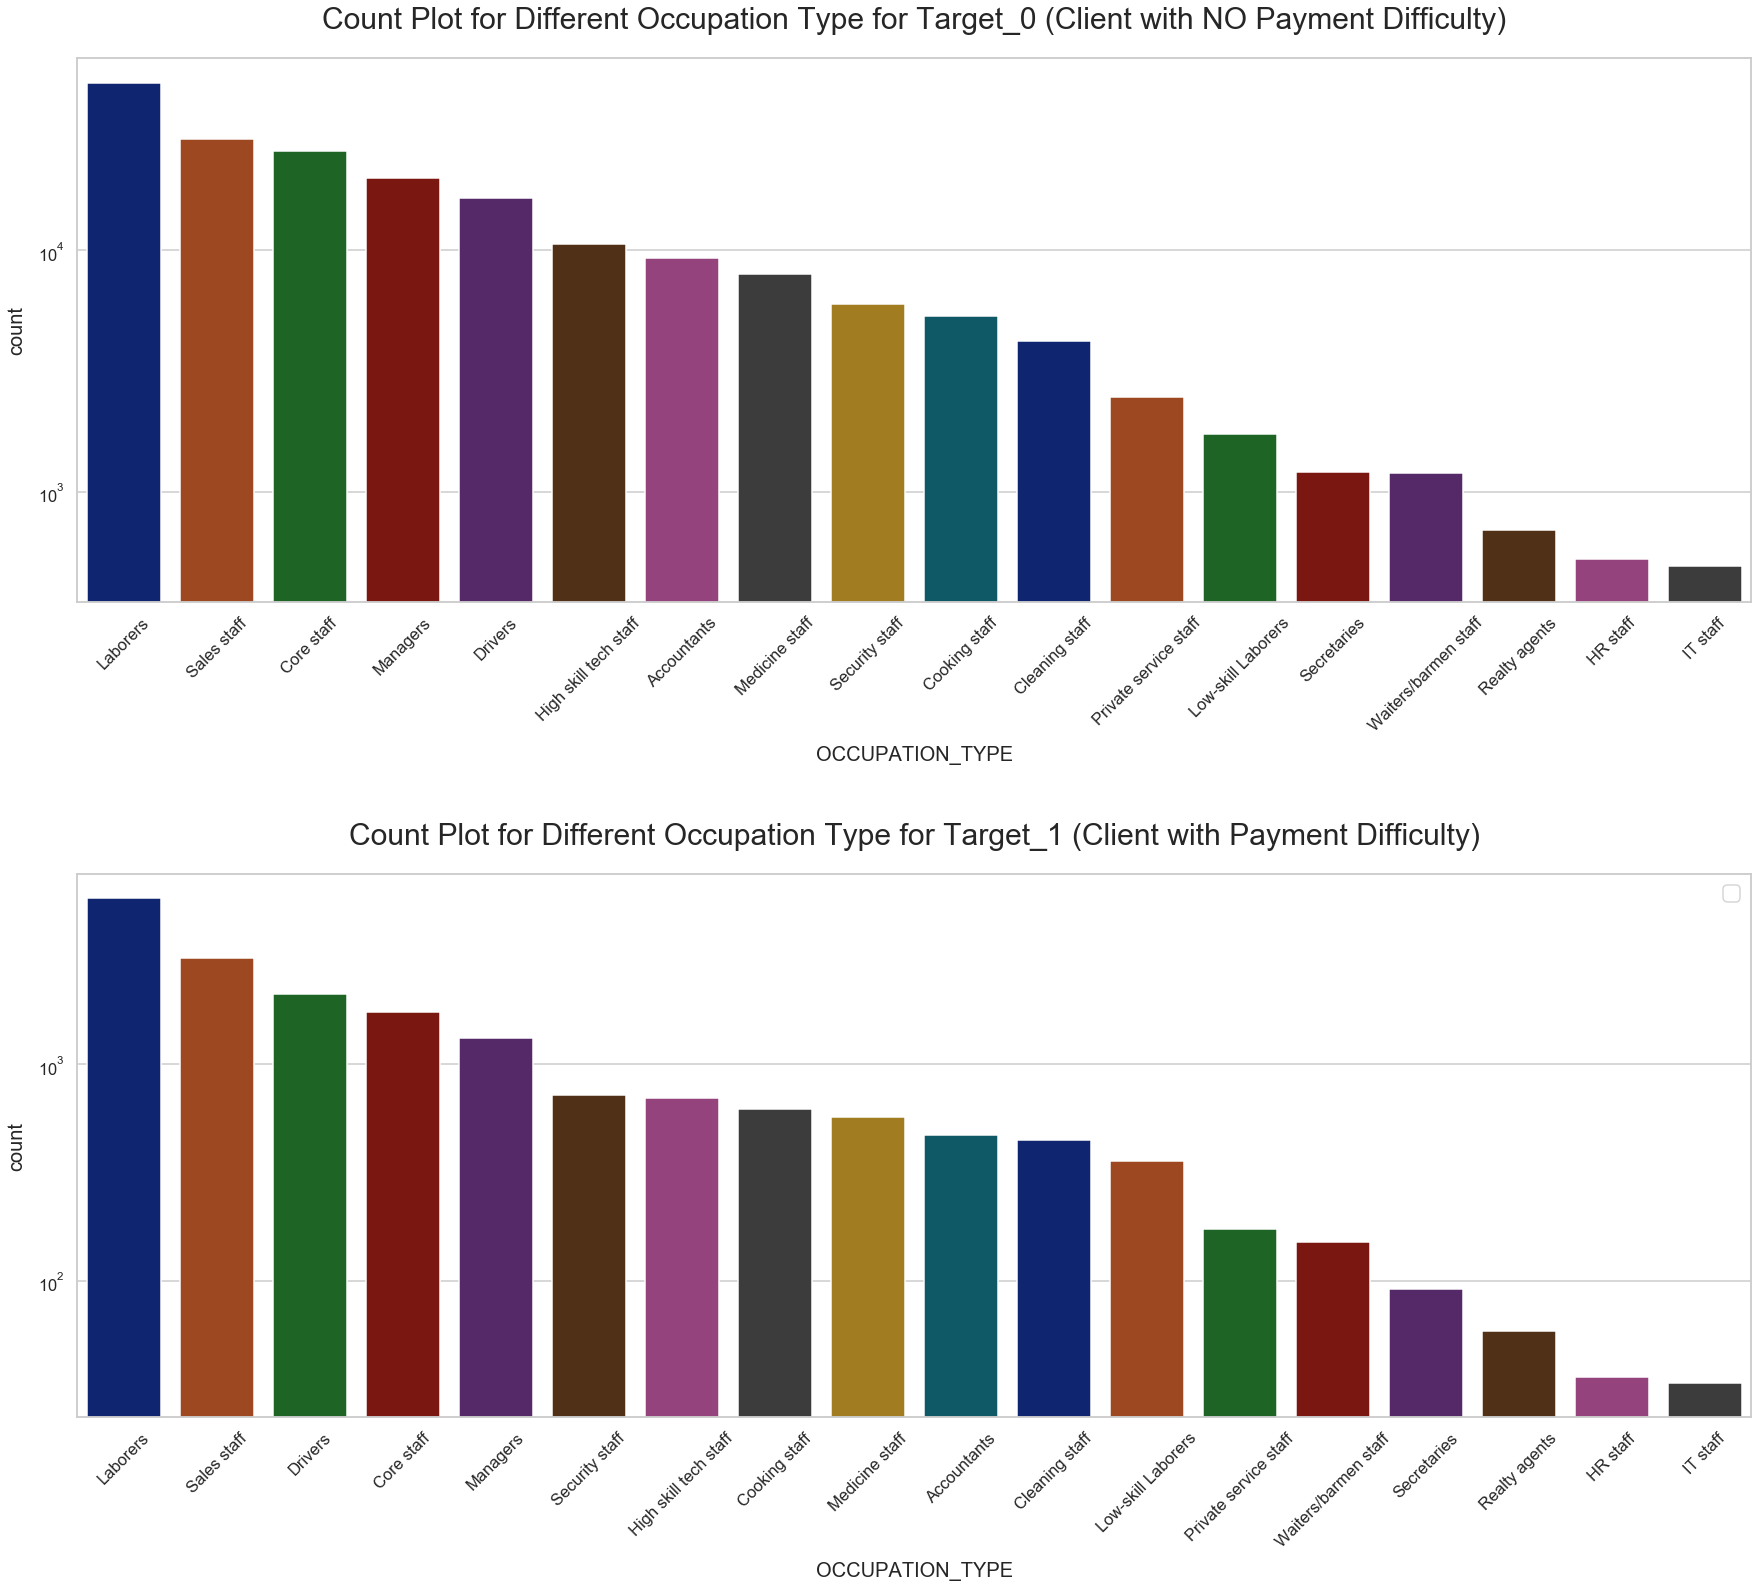

In [99]:
# Count Plot for contract type wrt gender
UniVarCatPlot(col_x = 'OCCUPATION_TYPE', title= 'Count Plot for Different Occupation Type', rotation= 45)

For Target_0
>1. Laborers have highest count.

For Target_1
>1. Similar to Target_0, LABORERS highest count.

Suggesting Bank to be careful in giveing loans to top 5 occupation type i.e Laborers, Sales_Staff, Drivers, Core Staff, Managers.

No handles with labels found to put in legend.


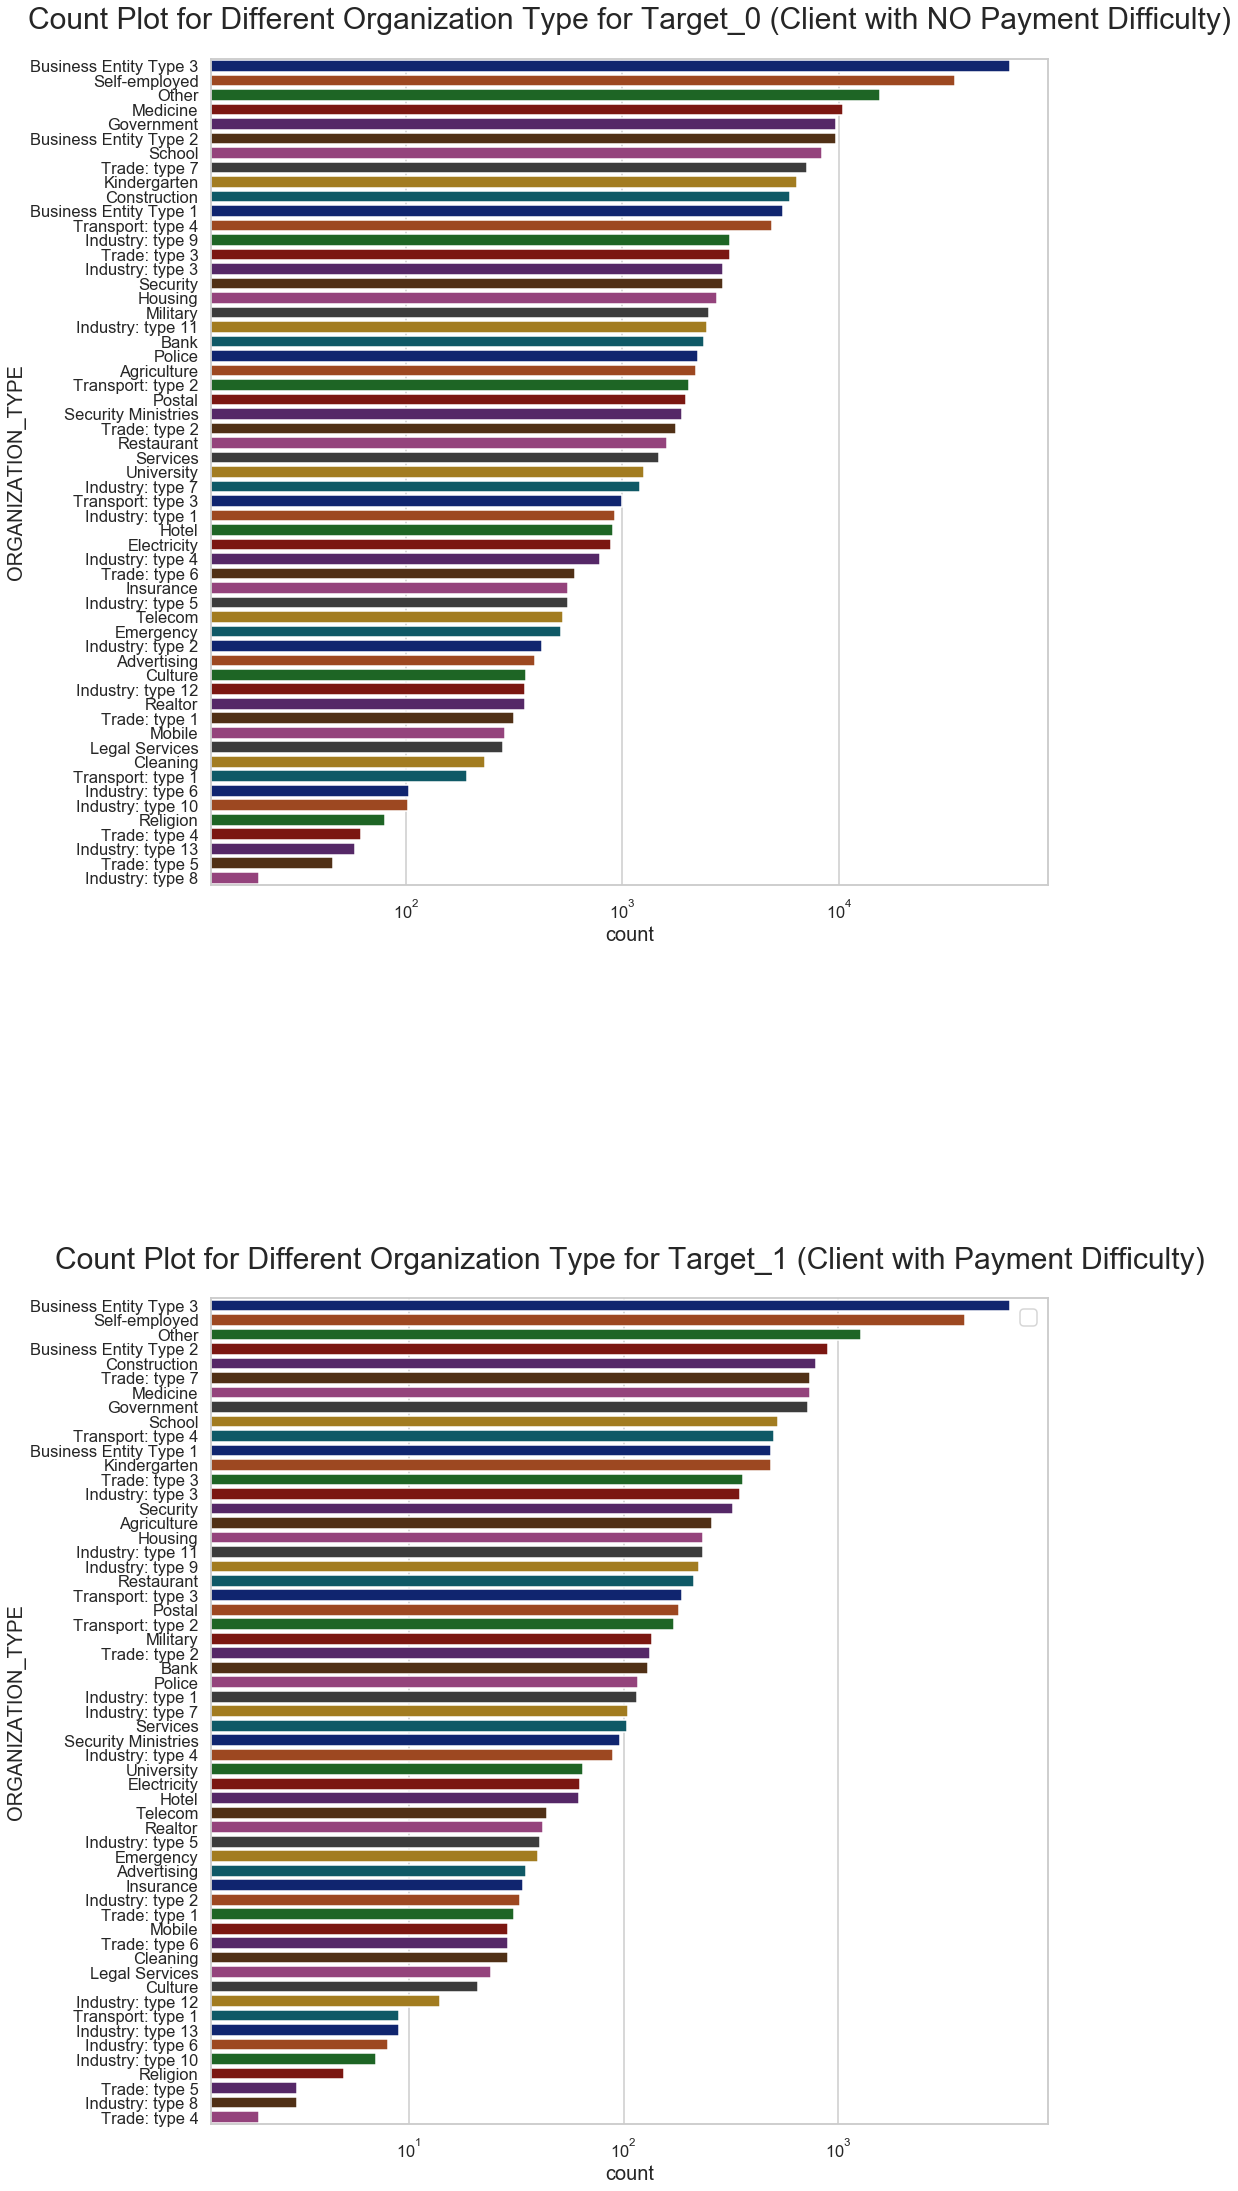

In [57]:
UniVarCatPlot(col_y = 'ORGANIZATION_TYPE', title= 'Count Plot for Different Organization Type')

For Target_0
>1. Clients which have applied for credits are from most of the organization type ‘Business entity Type 3’ , ‘Self employed’, ‘Other’ , ‘Medicine’ and ‘Government’.
2. Less clients are from Industry type 8,type 6, type 10, religion and trade type 5, type 4.

For Target_1
>1. Clients which have applied for credits are from most of the organization type ‘Business entity Type 3’ , ‘Self employed’ , ‘Other’ , ‘Medicine’ and ‘Government’.
2. Less clients are from Industry type 8,type 6, type 10, religion and trade type 5, type 4.
3. Same as type 0 in distribution of organization type.

In [58]:
# Finding Correlation between variables for Target_0
corr_0 = Target_0.corr()
# sns.heatmap(corr_0)
corr_0_df = corr_0.where(np.triu(np.ones(corr_0.shape), k=1).astype(np.bool))
corr_0_df = corr_0_df.unstack().reset_index()
corr_0_df.columns = ['Variable_1', 'Variable_2', 'Correlation']
corr_0_df.dropna(subset = ['Correlation'], inplace = True)
corr_0_df['Correlation'] = round(corr_0_df['Correlation'],2)
corr_0_df['Correlation'] = abs(corr_0_df['Correlation'])
corr_0_df.sort_values(by = 'Correlation', ascending = False).head(10)

,Variable_1,Variable_2,Correlation
154,AMT_GOODS_PRICE,AMT_CREDIT,0.99
389,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.86
467,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.82
155,AMT_GOODS_PRICE,AMT_ANNUITY,0.77
129,AMT_ANNUITY,AMT_CREDIT,0.76
363,REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,0.46
441,REG_CITY_NOT_WORK_CITY,REG_CITY_NOT_LIVE_CITY,0.44
128,AMT_ANNUITY,AMT_INCOME_TOTAL,0.40
233,DAYS_EMPLOYED,DAYS_BIRTH,0.35
413,REG_CITY_NOT_LIVE_CITY,REG_REGION_NOT_LIVE_REGION,0.34


In [59]:
# Finding Correlation between variables for Target_1
corr_1 = Target_1.corr()
corr_1_df = corr_1.where(np.triu(np.ones(corr_1.shape), k=1).astype(np.bool))
corr_1_df = corr_1_df.unstack().reset_index()
corr_1_df.columns = ['Variable_1', 'Variable_2', 'Correlation']
corr_1_df.dropna(subset = ['Correlation'], inplace = True)
corr_1_df['Correlation'] = round(corr_1_df['Correlation'],2)
corr_1_df['Correlation'] = abs(corr_1_df['Correlation'])
corr_1_df.sort_values(by = 'Correlation', ascending = False).head(10)

,Variable_1,Variable_2,Correlation
154,AMT_GOODS_PRICE,AMT_CREDIT,0.98
389,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.85
467,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.77
155,AMT_GOODS_PRICE,AMT_ANNUITY,0.75
129,AMT_ANNUITY,AMT_CREDIT,0.75
363,REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,0.51
441,REG_CITY_NOT_WORK_CITY,REG_CITY_NOT_LIVE_CITY,0.48
413,REG_CITY_NOT_LIVE_CITY,REG_REGION_NOT_LIVE_REGION,0.32
233,DAYS_EMPLOYED,DAYS_BIRTH,0.31
258,DAYS_REGISTRATION,DAYS_BIRTH,0.24


>The highest correlation is almost same in both Target_0 and Target_1 dataframe and between same variables.

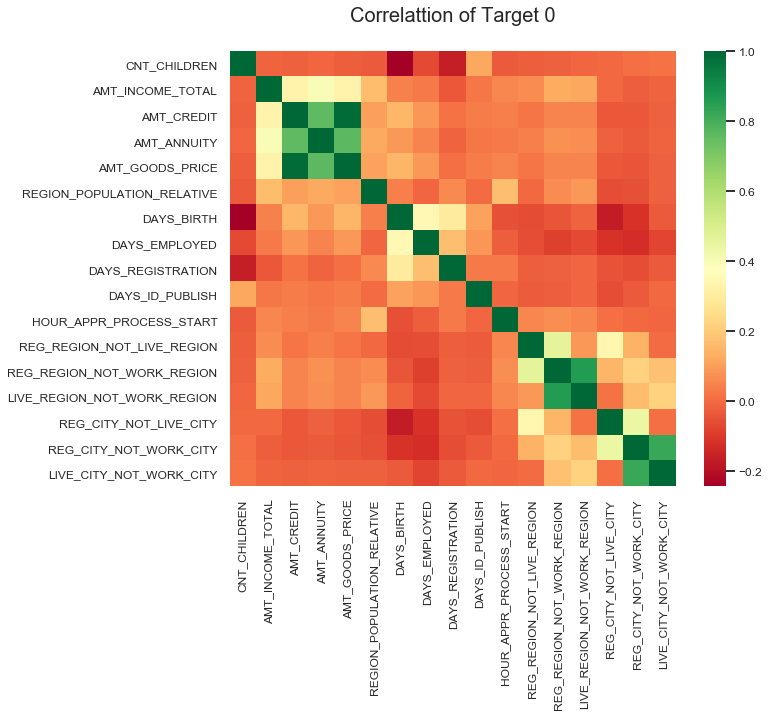

In [60]:
# Correlation Matrix for Target_0
plt.figure(figsize=(10, 8))
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.titlepad'] = 30
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12
plt.title('Correlattion of Target 0')
sns.heatmap(corr_0.iloc[2:-6,2:-6], cmap ='RdYlGn')

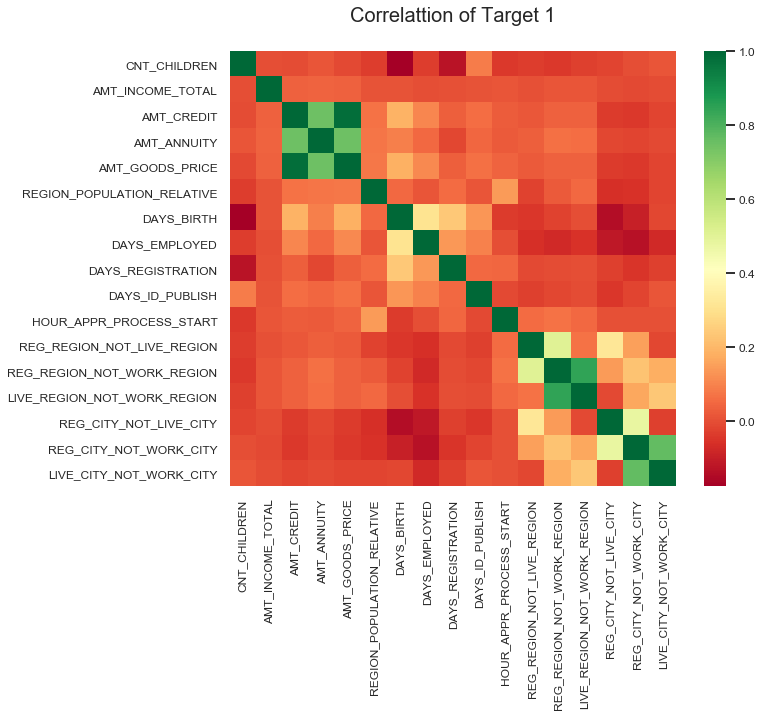

In [61]:
# Correlation Matrix for Target_1
plt.figure(figsize=(10, 8))
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.titlepad'] = 30
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12
plt.title('Correlattion of Target 1')
sns.heatmap(corr_1.iloc[2:-6,2:-6], cmap ='RdYlGn')

> We can see that both Correlation matrix for Target_0 and Target_1 are almost similar.

### Univariate Analysis for Numerical Variable

In [62]:
# Defining a function to plot the boxplot for different numerical col.
def UniVarNumPlot(title, col):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.figure(figsize=(15,6))
    plt.rcParams["axes.labelsize"] = 12
    plt.rcParams['xtick.labelsize']=12
    plt.rcParams['ytick.labelsize']=12
    plt.rcParams['axes.titlesize'] = 14
    plt.rcParams['axes.titleweight'] = 12
    plt.rcParams['axes.titlepad'] = 30
    

    #   1st subplot for Target_1    
    plt.subplots_adjust(wspace=1.5)
    plt.subplot(1,2,1)
    title1 = title + ' for Target_0'
    plt.title(title1)
    plt.yscale('log')    
    sns.boxplot(data = Target_0, x = col, orient = 'v')
    

    #   2nd subplot for Target_1
    plt.subplot(1,2,2)
    title2 = title + ' for Target_1'
    plt.title(title2)
    plt.yscale('log')
    sns.boxplot(data = Target_1, x = col, orient = 'v')
    plt.show()

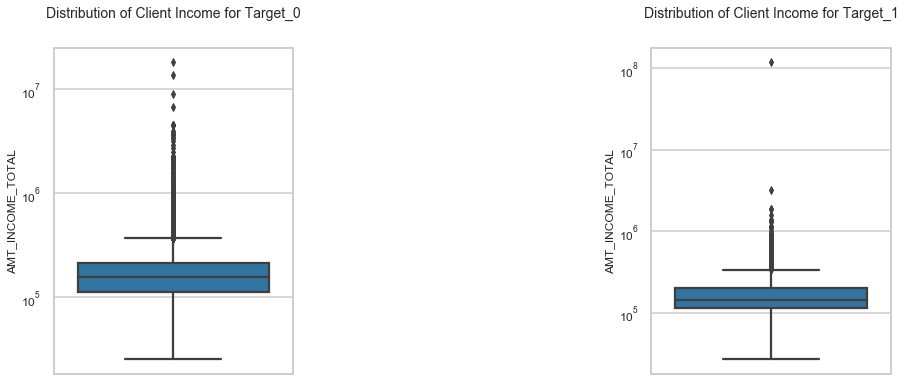

In [63]:
# Boxplot plot for Total Income between Target_0 and Target_1
UniVarNumPlot(col ='AMT_INCOME_TOTAL', title = 'Distribution of Client Income' )

For Target_0 Client Income

>Some outliers are noticed in income amount.
The third quartiles is very slim for income amount.


For Target_1 Client Income

>Some outliers are noticed in income amount.
The third quartiles is very slim for income amount.
Most of the clients of income are present in first quartile.

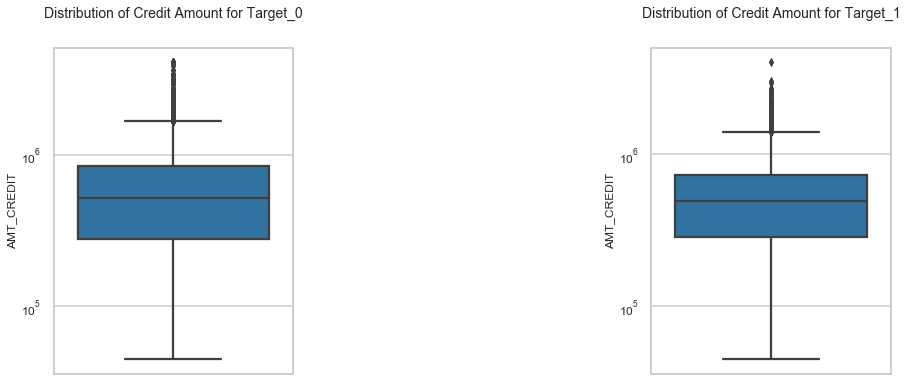

In [64]:
# Boxplot plot for Credit Amt between Target_0 and Target_1
UniVarNumPlot(col ='AMT_CREDIT', title = 'Distribution of Credit Amount' )

> Both Target_0 and Target_1 has similar type of boxplot.

> Some outliers are noticed in credit amount.
The first quartile is bigger than third quartile for credit amount which means most of the credits of clients are present in the first quartile.


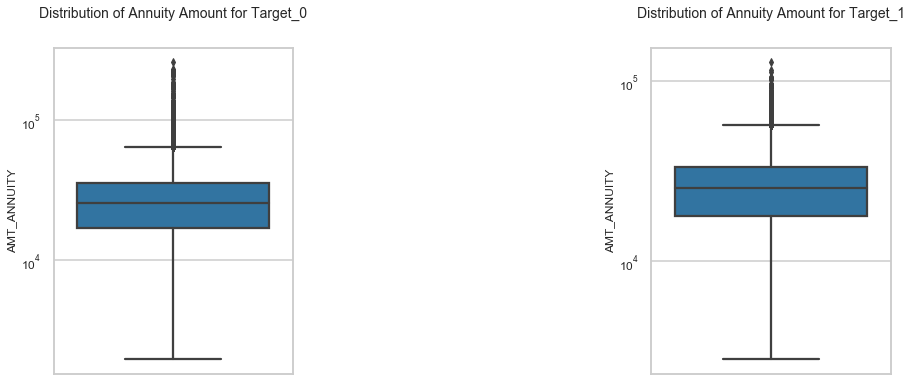

In [65]:
# Boxplot plot for Credit Amt between Target_0 and Target_1
UniVarNumPlot(col ='AMT_ANNUITY', title = 'Distribution of Annuity Amount' )

> For Target_0
Some outliers are noticed in credit amount.
The first quartile is bigger than third quartile for credit amount which means most of the credits of clients are present in the first quartile.

> For Target_1
Some outliers are noticed in annuity amount.
The first quartile is bigger than third quartile for annuity amount which means most of the annuity clients are from first quartile.
 
> Both Target_0 and Target_1 has similar type of boxplot for Annuity amount.

#### Bivariate analysis for numerical variables

In [66]:
# Function for Bi- variate Boxplot analysis
def BiVarPlot(data, col_x, col_y, hue, title, scale=None):
    plt.rcParams["axes.labelsize"] = 12
    plt.rcParams["axes.labelpad"] = 12
    plt.rcParams['xtick.labelsize']=12
    plt.rcParams['ytick.labelsize']=12
    plt.rcParams['axes.titlesize'] = 14
    plt.rcParams['axes.titleweight'] = 12
    plt.rcParams['axes.titlepad'] = 30
    plt.figure(figsize=(16,12))
    plt.xticks(rotation=0)
    if scale:
        plt.yscale(scale)
    sns.boxplot(data = data, x= col_x, y= col_y, hue= hue, orient='v')
    plt.title(title)
    plt.show()

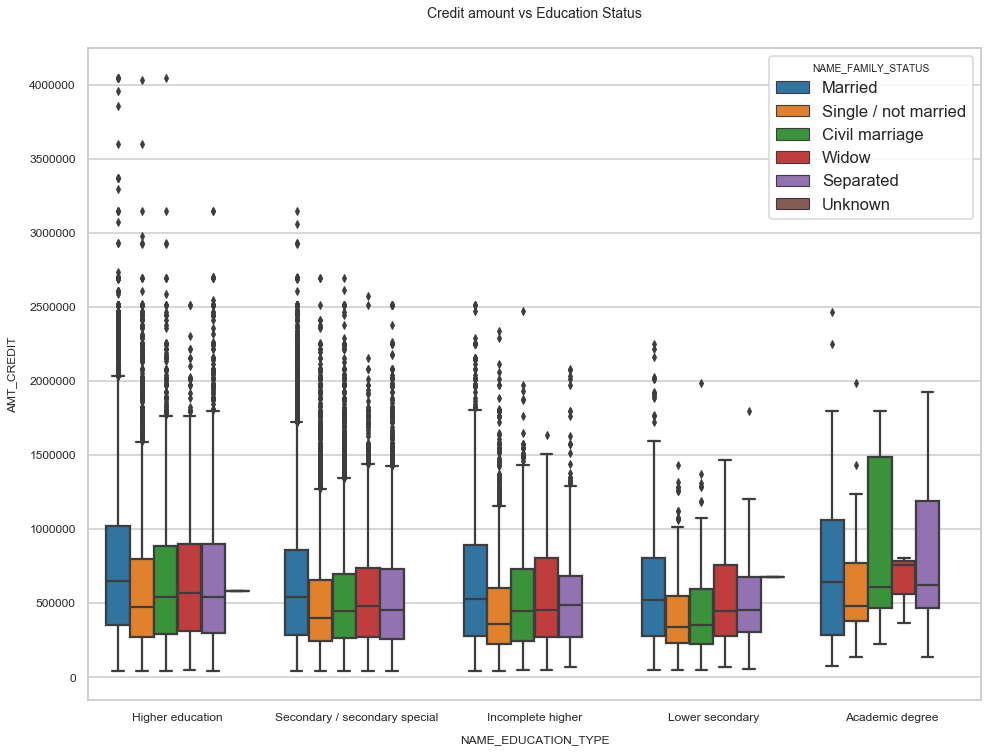

In [67]:
# Box plotting for Credit amount for Target_0
BiVarPlot(data = Target_0,
          col_x='NAME_EDUCATION_TYPE',
          col_y='AMT_CREDIT',
          hue='NAME_FAMILY_STATUS',
          title='Credit amount vs Education Status')

> From the above box plot we can say that Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education are having higher number of credits than others.

> Most of the outliers are from Education type 'Higher education' and 'Secondary'. 

> Civil marriage for Academic degree is having most of the credits in the third quartile.

>These all above mentioned categories of people have no difficulty in paying back the loan.

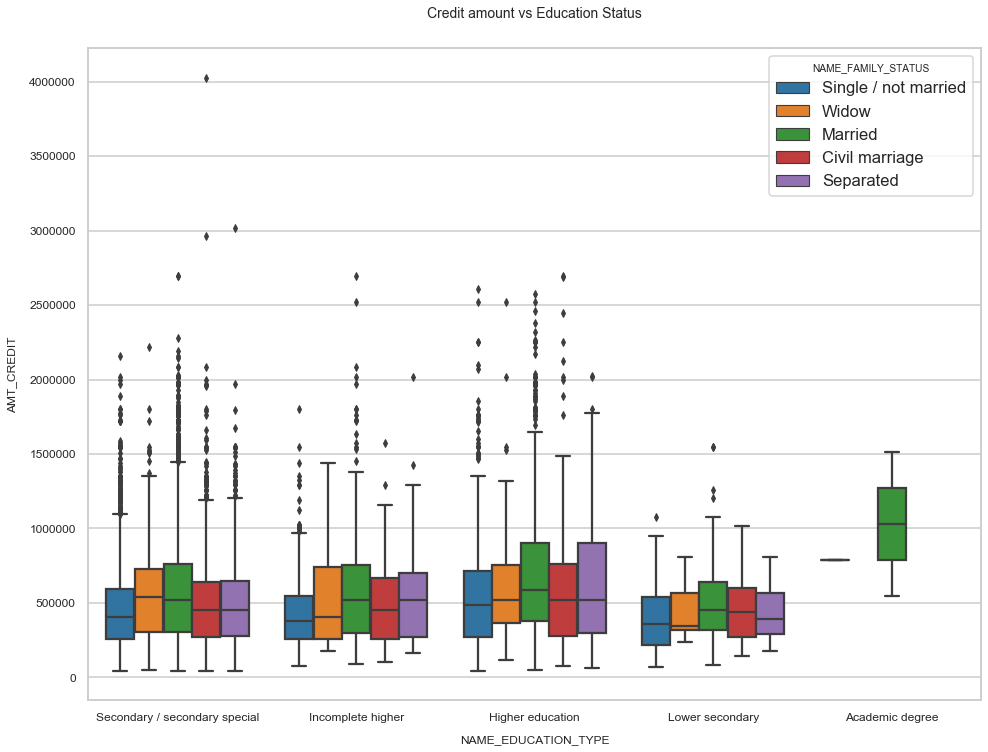

In [68]:
# Box plotting for Credit amount for Target_1
BiVarPlot(data = Target_1,
          col_x='NAME_EDUCATION_TYPE',
          col_y='AMT_CREDIT',
          hue='NAME_FAMILY_STATUS',
          title='Credit amount vs Education Status')

> Married people with Academic degree has highest Credit amount than all other education type. And other family status has neligible credit. This shows that Married people with Academic degree are having more difficulties in paying back the loan.

> While  most of the outliers are Secondary/Secodary special.

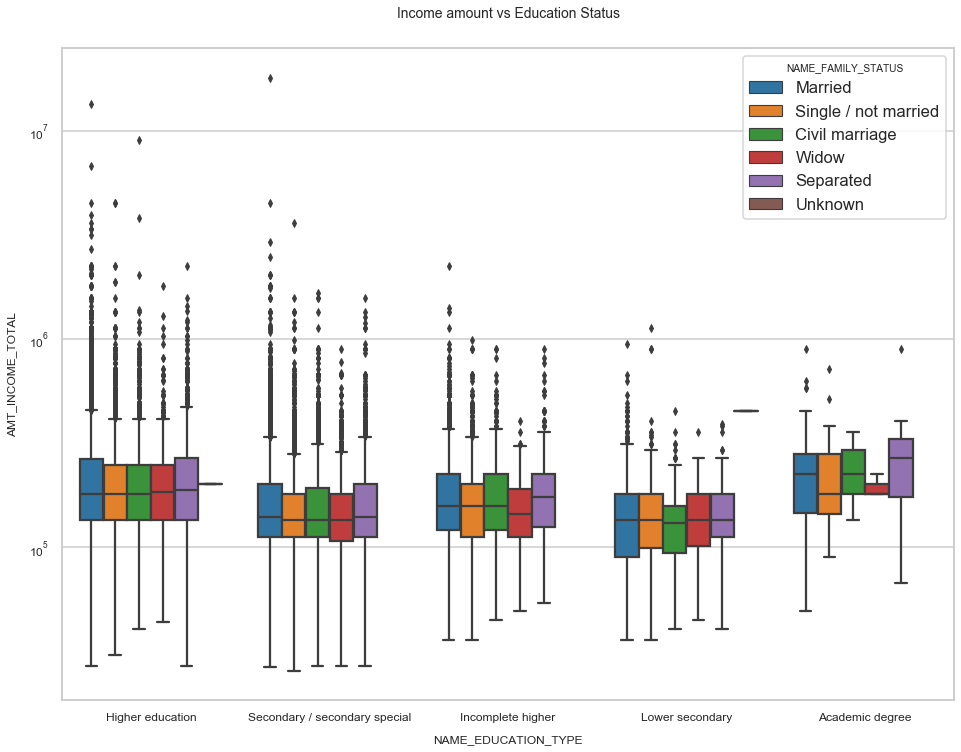

In [69]:
# Box plotting for Income amount in logarithmic scale for Target_0
BiVarPlot(data = Target_0,
          col_x='NAME_EDUCATION_TYPE',
          col_y='AMT_INCOME_TOTAL',
          hue='NAME_FAMILY_STATUS',
          title='Income amount vs Education Status',
          scale='log')

>From above boxplot for Education type 'Higher education' the income amount is mostly equal with family status same goes for 'Secondary Education'.

>Less outlier are having for Academic degree but there income amount is little higher that Higher education. Lower secondary are have less income amount than others.



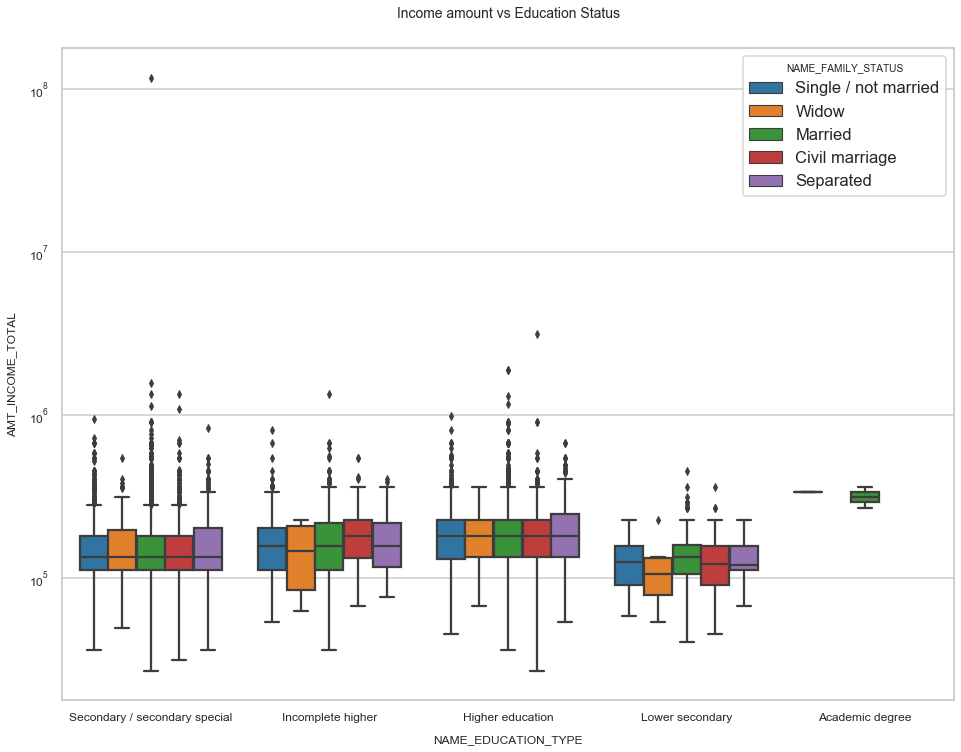

In [70]:
# Box plotting for Income amount in logarithmic scale for Target_1
BiVarPlot(data = Target_1,
          col_x='NAME_EDUCATION_TYPE',
          col_y='AMT_INCOME_TOTAL',
          hue='NAME_FAMILY_STATUS',
          title='Income amount vs Education Status',
          scale='log')

## 5. Read previous_application data

In [71]:
# Loading previous_application and application_data  datasets
prev_application = pd.read_csv('previous_application.csv')

In [72]:
# display top 5 rows of prev_application dataframe
prev_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
# Printing shape of both dataset
print(f'Shape of prev_application : {prev_application.shape}')

Shape of prev_application : (1670214, 37)


In [74]:
prev_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [75]:
prev_application.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [76]:
# Column wise Null percentage in prev_application
null_percentage_prev = round(prev_application.isnull().sum()/prev_application.shape[0]*100, 2)
print(null_percentage_prev)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

>Looks like there are some missing values present in some columns of the previous_application dataset

In [77]:
# Getting the list of columns with more than 45% of null values 
prev_colToDrop = list(null_percentage_prev[null_percentage_prev >= 35].index)

In [78]:
print(f'No. of col. to be drop: {len(prev_colToDrop)}')
prev_colToDrop

No. of col. to be drop: 11


['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [79]:
# Dropping the columns from prev_application dataframe
prev_application.drop(prev_colToDrop, axis= 1, inplace = True)

In [80]:
# Rechecking column wise Null percentage in prev_application
null_percentage_prev = round(prev_application.isnull().sum()/prev_application.shape[0]*100, 2)
print(null_percentage_prev)
print(f'New shape of prev_application: {prev_application.shape}')

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
NAME_SELLER_INDUSTRY            0.00
CNT_PAYMENT                    22.29
NAME_YIELD_GROUP                0.00
PRODUCT_COMBINATION             0.02
dtype: float64
New shape of prev_appli

In [81]:
# Getting columns with missing values between 0% and 35%
missing_value_col_prev = list(null_percentage_prev[null_percentage_prev > 0].index)
missing_value_col_prev

['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_PAYMENT', 'PRODUCT_COMBINATION']

In [82]:
round(prev_application.NAME_CASH_LOAN_PURPOSE.value_counts()/prev_application.shape[0]*100,2)

XAP                                 55.24
XNA                                 40.59
Repairs                              1.42
Other                                0.93
Urgent needs                         0.50
Buying a used car                    0.17
Building a house or an annex         0.16
Everyday expenses                    0.14
Medicine                             0.13
Payments on other loans              0.12
Education                            0.09
Journey                              0.07
Purchase of electronic equipment     0.06
Buying a new car                     0.06
Wedding / gift / holiday             0.06
Buying a home                        0.05
Car repairs                          0.05
Furniture                            0.04
Buying a holiday home / land         0.03
Business development                 0.03
Gasification / water supply          0.02
Buying a garage                      0.01
Hobby                                0.00
Money for a third person          

> there are majority of value as 'XAN' and 'XAP' combined account to 96% of rows

In [83]:
# Dropping rows conating 'XNA' and 'XAP'
prev_application=prev_application.drop(prev_application[prev_application['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
prev_application=prev_application.drop(prev_application[prev_application['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

In [84]:
prev_application.shape

(69635, 26)

In [85]:
# Merging prev_application and app_data on SK_ID_CURR
merged_df = pd.merge(left = app_data, right=prev_application, how='inner', on='SK_ID_CURR', suffixes='_o')

In [86]:
merged_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY_,AMT_GOODS_PRICE_,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START_,HOUR_APPR_PROCESS_START_,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPEo,AMT_ANNUITYo,AMT_APPLICATION,AMT_CREDITo,AMT_GOODS_PRICEo,WEEKDAY_APPR_PROCESS_STARTo,HOUR_APPR_PROCESS_STARTo,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100034,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,180000.0,Unaccompanied,Working,Higher education,Single / not married,With parents,0.030755,10341,1010,4799.0,3015,Laborers,TUESDAY,16,0,0,0,0,0,0,Business Entity Type 3,NaN,NaN,NaN,NaN,NaN,NaN,0-100000,150000-200000,1390369,Cash loans,22430.430,94500.0,109971.0,94500.0,FRIDAY,11,Y,1,Other,Approved,-599,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,6.0,high,Cash Street: high
1,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,477000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,15280,2668,5266.0,3787,NaN,WEDNESDAY,13,0,0,0,0,0,0,Business Entity Type 3,0.0,0.0,0.0,1.0,0.0,5.0,200000-300000,650000-700000,1344613,Cash loans,33238.800,1260000.0,1260000.0,1260000.0,WEDNESDAY,14,Y,1,Payments on other loans,Refused,-119,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,60.0,low_action,Cash Street: low
2,100039,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,679500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.015221,11694,2060,3557.0,3557,Drivers,THURSDAY,10,0,0,0,1,1,0,Self-employed,0.0,0.0,0.0,0.0,1.0,1.0,300000-400000,700000-750000,1077565,Cash loans,52513.515,1350000.0,1487214.0,1350000.0,MONDAY,14,Y,1,Buying a used car,Approved,-695,Cash through the bank,XAP,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,-1,XNA,42.0,low_normal,Cash Street: low
3,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.025164,16126,1761,8236.0,4292,Managers,TUESDAY,8,0,0,0,0,0,0,Business Entity Type 3,0.0,0.0,0.0,1.0,0.0,1.0,100000-200000,500000-550000,1223113,Cash loans,28390.635,337500.0,407911.5,337500.0,MONDAY,13,Y,1,Repairs,Approved,-539,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,18.0,low_normal,Cash Street: low
4,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.025164,16126,1761,8236.0,4292,Managers,TUESDAY,8,0,0,0,0,0,0,Business Entity Type 3,0.0,0.0,0.0,1.0,0.0,1.0,100000-200000,500000-550000,1529558,Cash loans,29053.215,450000.0,555723.0,450000.0,MONDAY,15,Y,1,Repairs,Refused,-449,Cash through the bank,LIMIT,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,low_normal,Cash Street: low


In [87]:
# Renaming the col
merged_df = merged_df.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE',
                         'AMT_CREDIT_':'AMT_CREDIT',
                         'AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START',
                         'NAME_CONTRACT_TYPEo':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITo':'AMT_CREDIT_PREV',
                         'AMT_ANNUITYo':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTo':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTo':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)

In [88]:
merged_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE_,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPE_PREV,AMT_ANNUITY_PREV,AMT_APPLICATION,AMT_CREDIT_PREV,AMT_GOODS_PRICEo,WEEKDAY_APPR_PROCESS_START_PREV,HOUR_APPR_PROCESS_START_PREV,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100034,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,180000.0,Unaccompanied,Working,Higher education,Single / not married,With parents,0.030755,10341,1010,4799.0,3015,Laborers,TUESDAY,16,0,0,0,0,0,0,Business Entity Type 3,NaN,NaN,NaN,NaN,NaN,NaN,0-100000,150000-200000,1390369,Cash loans,22430.430,94500.0,109971.0,94500.0,FRIDAY,11,Y,1,Other,Approved,-599,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,6.0,high,Cash Street: high
1,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,477000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,15280,2668,5266.0,3787,NaN,WEDNESDAY,13,0,0,0,0,0,0,Business Entity Type 3,0.0,0.0,0.0,1.0,0.0,5.0,200000-300000,650000-700000,1344613,Cash loans,33238.800,1260000.0,1260000.0,1260000.0,WEDNESDAY,14,Y,1,Payments on other loans,Refused,-119,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,60.0,low_action,Cash Street: low
2,100039,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,679500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.015221,11694,2060,3557.0,3557,Drivers,THURSDAY,10,0,0,0,1,1,0,Self-employed,0.0,0.0,0.0,0.0,1.0,1.0,300000-400000,700000-750000,1077565,Cash loans,52513.515,1350000.0,1487214.0,1350000.0,MONDAY,14,Y,1,Buying a used car,Approved,-695,Cash through the bank,XAP,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,-1,XNA,42.0,low_normal,Cash Street: low
3,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.025164,16126,1761,8236.0,4292,Managers,TUESDAY,8,0,0,0,0,0,0,Business Entity Type 3,0.0,0.0,0.0,1.0,0.0,1.0,100000-200000,500000-550000,1223113,Cash loans,28390.635,337500.0,407911.5,337500.0,MONDAY,13,Y,1,Repairs,Approved,-539,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,18.0,low_normal,Cash Street: low
4,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.025164,16126,1761,8236.0,4292,Managers,TUESDAY,8,0,0,0,0,0,0,Business Entity Type 3,0.0,0.0,0.0,1.0,0.0,1.0,100000-200000,500000-550000,1529558,Cash loans,29053.215,450000.0,555723.0,450000.0,MONDAY,15,Y,1,Repairs,Refused,-449,Cash through the bank,LIMIT,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,low_normal,Cash Street: low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51414,456228,0,Cash loans,F,Y,N,0,540000.0,

In [89]:
# Removing Unwanted columns
merged_df.drop(['WEEKDAY_APPR_PROCESS_START',
              'HOUR_APPR_PROCESS_START',
              'REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION',
              'LIVE_REGION_NOT_WORK_REGION',
              'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 
              'LIVE_CITY_NOT_WORK_CITY',
              'WEEKDAY_APPR_PROCESS_START_PREV',
              'HOUR_APPR_PROCESS_START_PREV', 
              'FLAG_LAST_APPL_PER_CONTRACT',
              'NFLAG_LAST_APPL_IN_DAY',
              'NAME_GOODS_CATEGORY',
              'SELLERPLACE_AREA',
              'NAME_SELLER_INDUSTRY'],axis=1,inplace=True)

In [90]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51419 entries, 0 to 51418
Data columns (total 49 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   SK_ID_CURR                  51419 non-null  int64   
 1   TARGET                      51419 non-null  int64   
 2   NAME_CONTRACT_TYPE          51419 non-null  object  
 3   CODE_GENDER                 51419 non-null  object  
 4   FLAG_OWN_CAR                51419 non-null  object  
 5   FLAG_OWN_REALTY             51419 non-null  object  
 6   CNT_CHILDREN                51419 non-null  int64   
 7   AMT_INCOME_TOTAL            51419 non-null  float64 
 8   AMT_CREDIT                  51419 non-null  float64 
 9   AMT_ANNUITY                 51412 non-null  float64 
 10  AMT_GOODS_PRICE_            51365 non-null  float64 
 11  NAME_TYPE_SUITE             51242 non-null  object  
 12  NAME_INCOME_TYPE            51419 non-null  object  
 13  NAME_EDUCATION_T

In [91]:
# Function for Univariate Analysis on merged_df using count plot
def UniVariatePlot(dataframe, col_y, hue, title):
    sns.set_style('whitegrid')
    sns.set_context('talk')

    plt.figure(figsize=(15,25))
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    plt.xscale('log')
    plt.title(title)
    sns.countplot(data = merged_df,
                  y= col_y,
                  order=merged_df[col_y].value_counts().index,
                  hue = hue,
                  palette='dark')

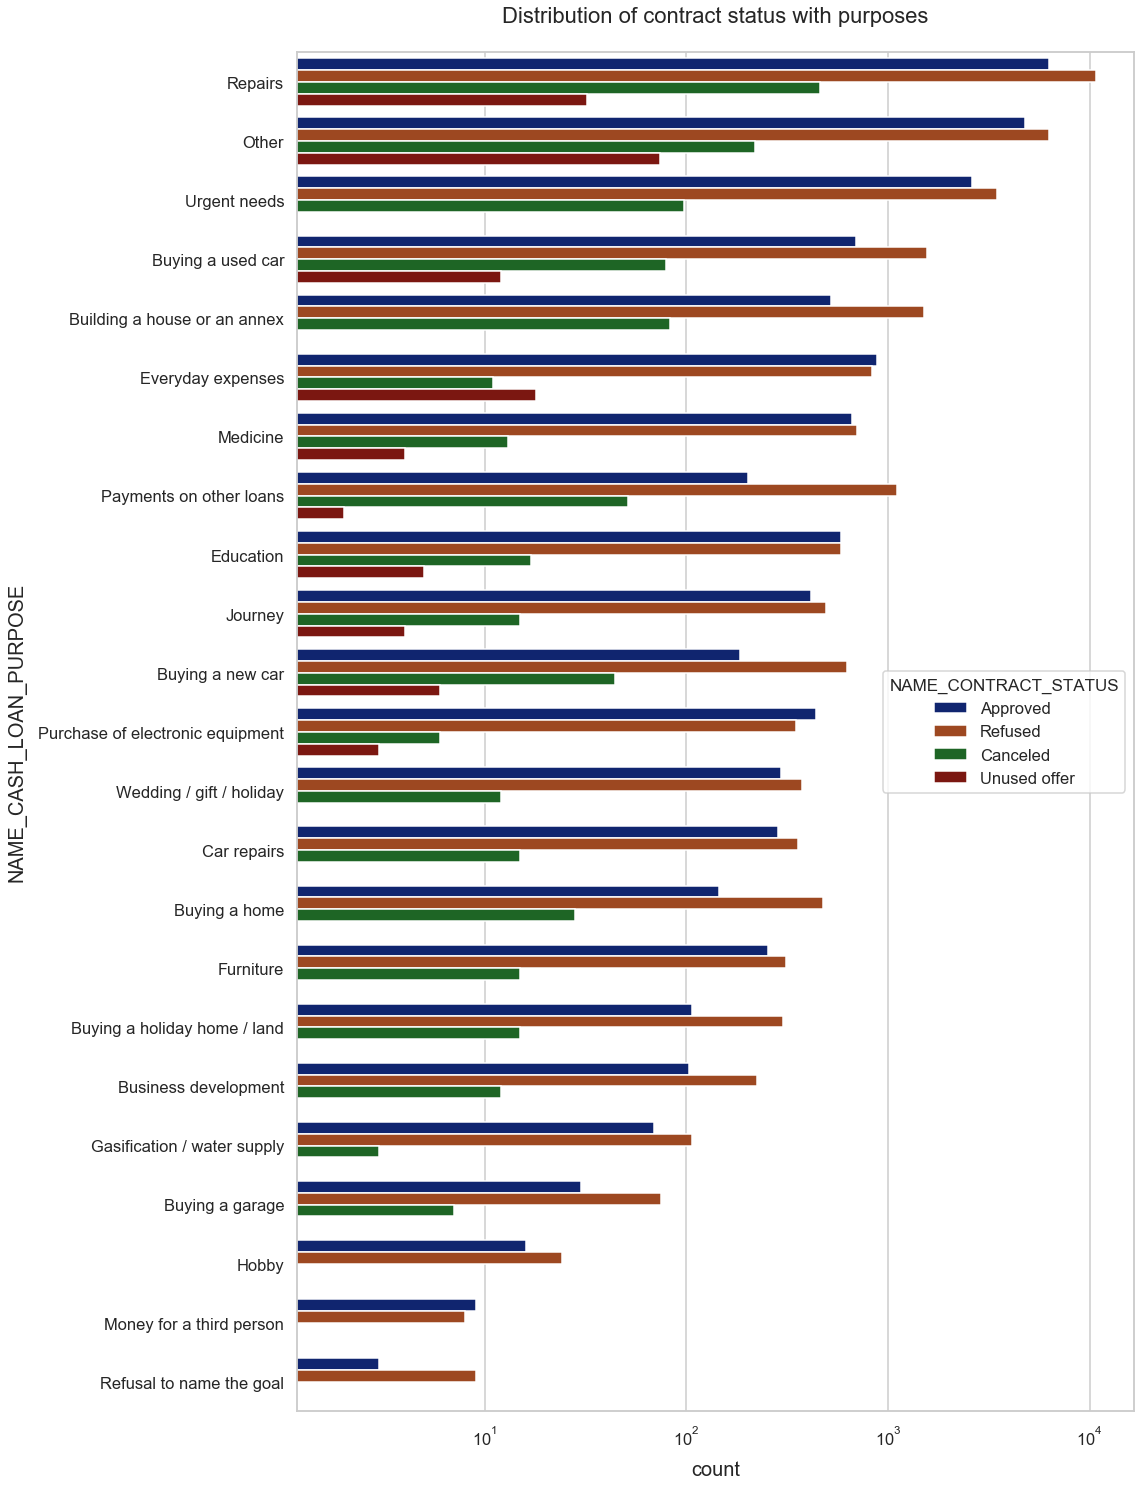

In [92]:
# Distribution of contract status in logarithmic scale
UniVariatePlot(dataframe=merged_df,
               col_y = 'NAME_CASH_LOAN_PURPOSE', 
               hue='NAME_CONTRACT_STATUS', 
               title= 'Distribution of contract status with purposes')

> Most rejection of loans came from purpose 'repairs'.

> For education purposes we have equal number of approves and rejection.

> Payign other loans and buying a new car is having significant higher rejection than approves.

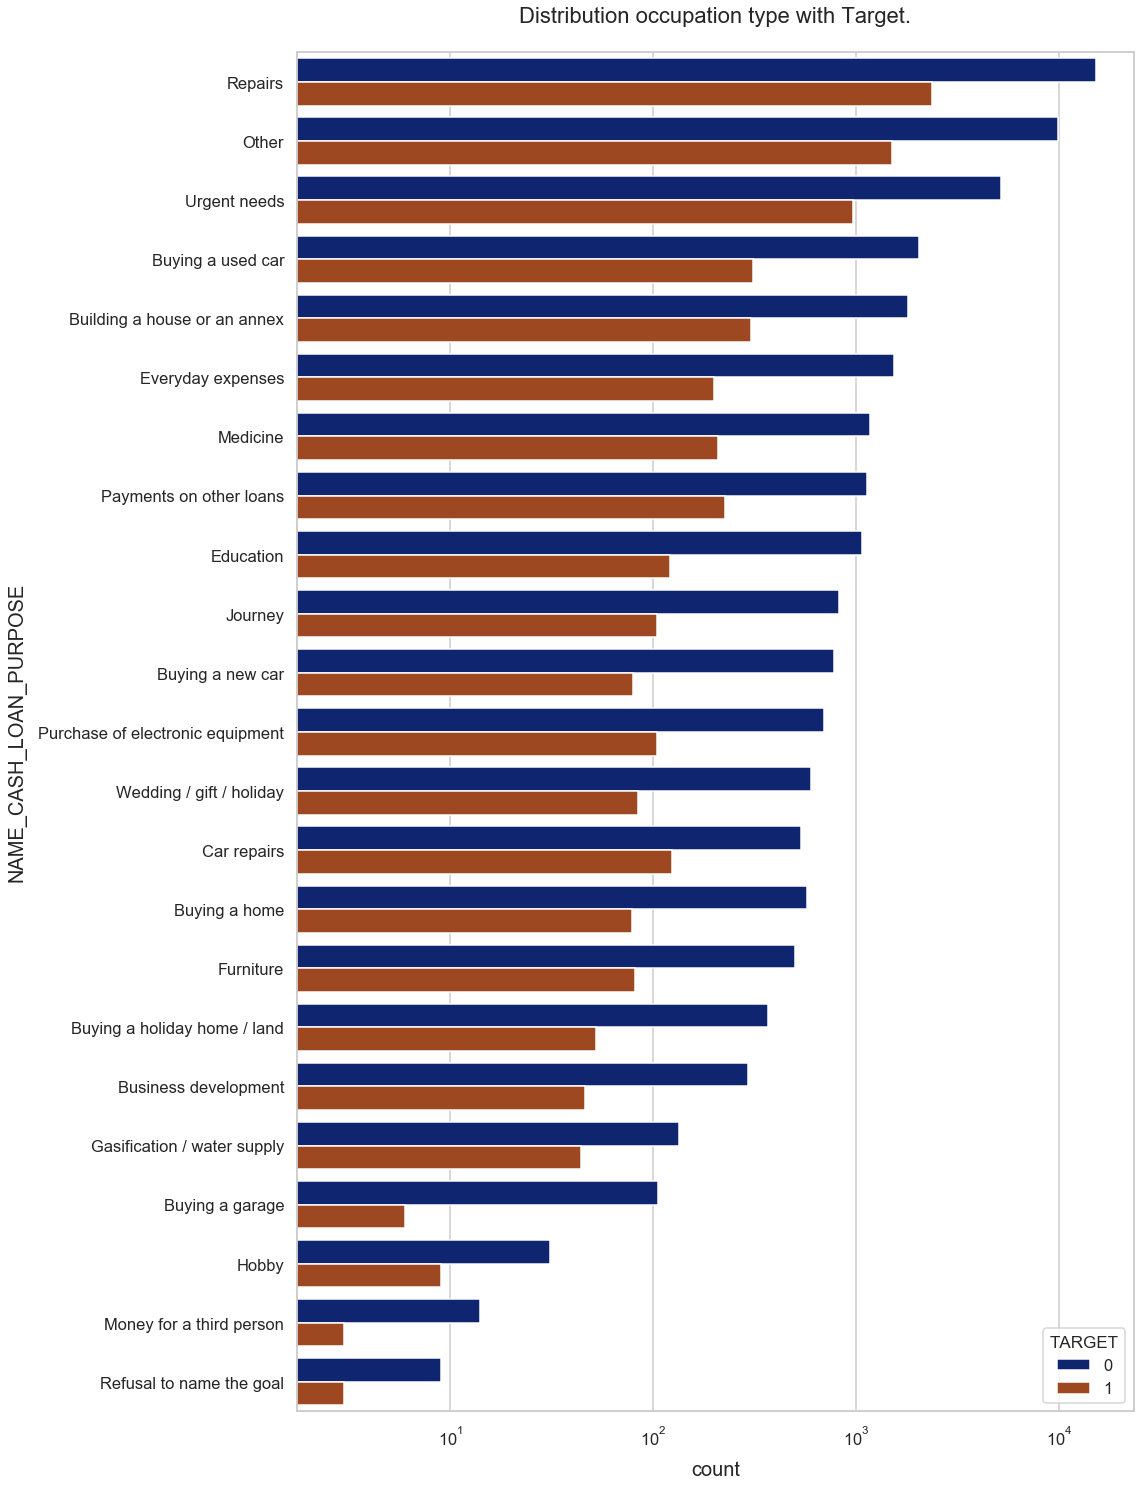

In [93]:
# Distribution of Target
UniVariatePlot(dataframe=merged_df, 
               col_y='NAME_CASH_LOAN_PURPOSE', 
               hue='TARGET', 
               title='Distribution occupation type with Target.')

> Loan purposes with 'Repairs' are facing more difficulites in payment on time.

> There are few places where client with no loan payment difficulty is significant higher than client facing difficulties in payment. They are 'Buying a garage', 'Business developemt', 'Buying land','Buying a new car' and 'Education' Hence we can focus on these purposes for which the client is having for minimal payment difficulties.

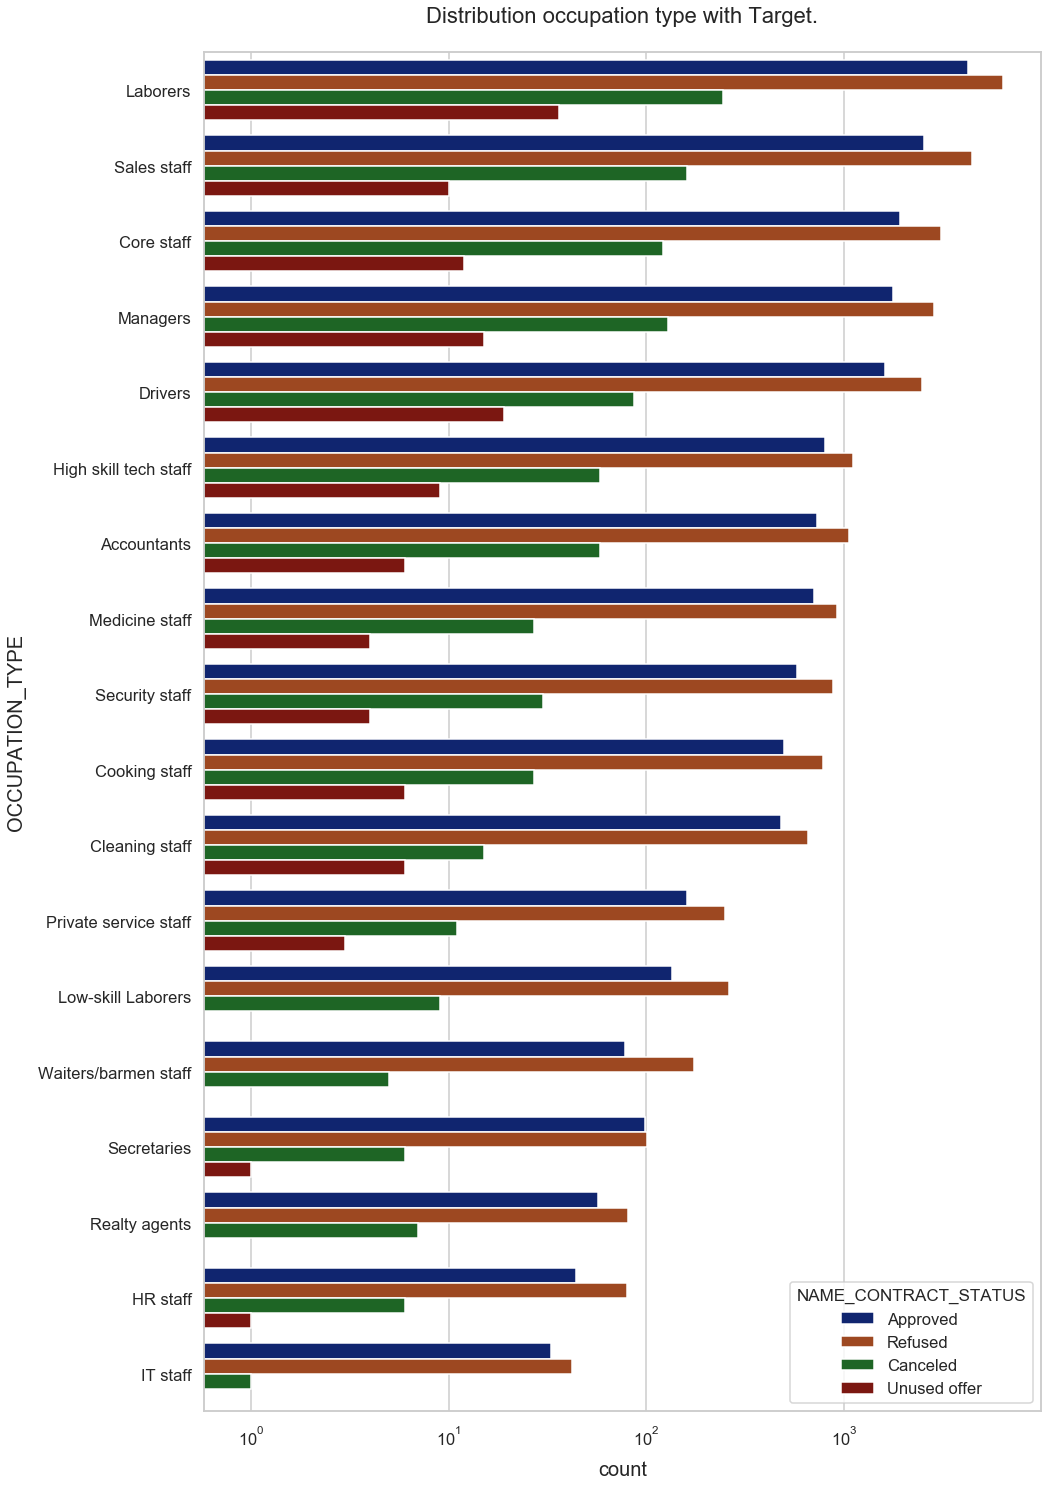

In [94]:
UniVariatePlot(dataframe=merged_df, 
               col_y='OCCUPATION_TYPE', 
               hue='NAME_CONTRACT_STATUS', 
               title='Distribution occupation type with Target.')

> Refused contract status are more than Approved in every occupation type.

> Labours have highest count while IT staff has least count for credit.

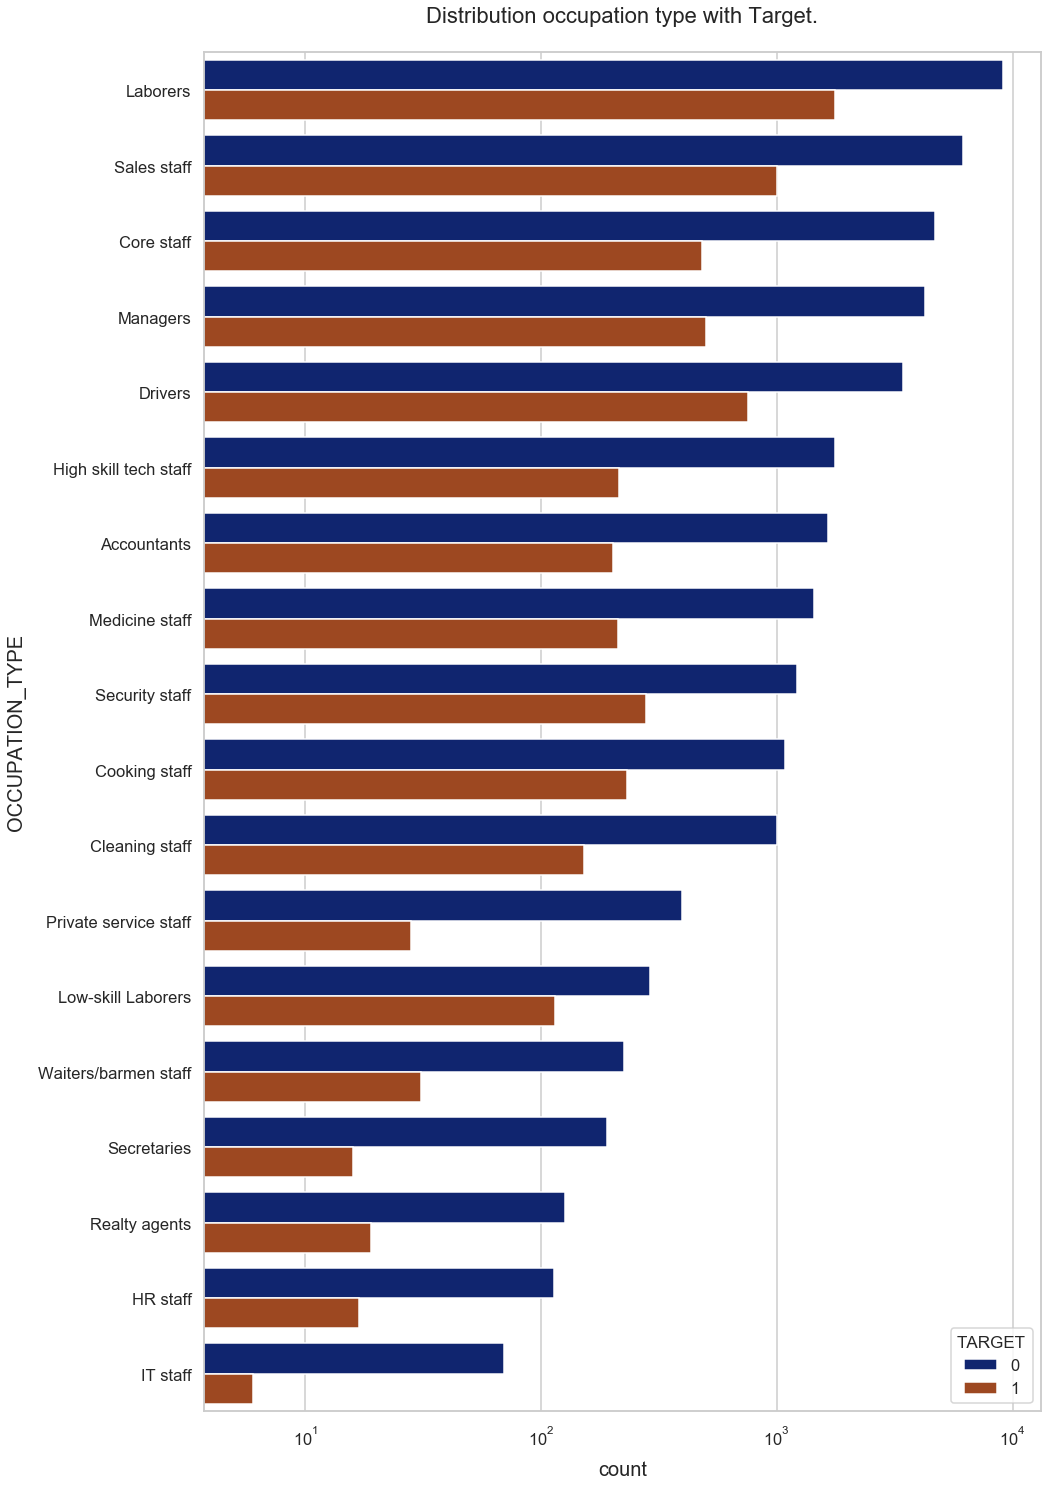

In [95]:
UniVariatePlot(dataframe=merged_df, 
               col_y='OCCUPATION_TYPE', 
               hue='TARGET', 
               title='Distribution occupation type with Target.')

> All occupation type has higher count for target_0 which is no difficultly in payment of loan.

> IT Staff has significant +ve difference between target_0 and target_1, which represent IT Staff are Safer occupation type to give loan.

#### Performing Bivariate Analysis

In [96]:
# Function for Bivariate Analysis on merged_df using boxplot
def BiVariatePlot(dataframe, col_x, col_y, hue, title):
    sns.set_style('whitegrid')
    sns.set_context('talk')

    plt.figure(figsize=(16,12))
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    plt.yscale('log')
    plt.title(title)
    plt.xticks(rotation=90)
    sns.boxplot(data = merged_df,
                x = col_x,
                y= col_y,
                hue = hue,
                orient='v')
    plt.show()

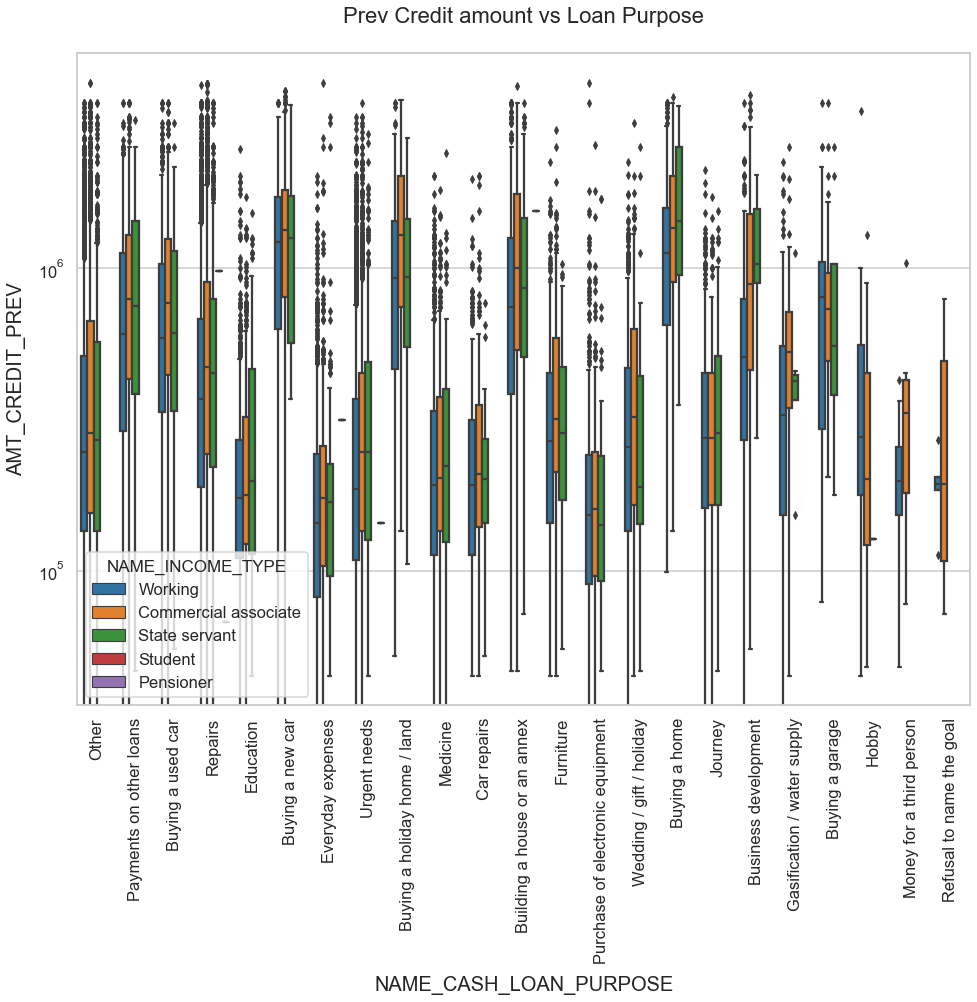

In [97]:
# Box plotting for Credit amount in logarithmic scale
BiVariatePlot(dataframe=merged_df,
              col_x='NAME_CASH_LOAN_PURPOSE',
              col_y='AMT_CREDIT_PREV',
              hue='NAME_INCOME_TYPE',
              title='Prev Credit amount vs Loan Purpose')

> Loan for 'Buying a new car, Buying a holiday Home/Land, Buying a Houe or an annex,  Buying a Home, Buying a Garage' is igher compared to other loan purpose. This implies that people are taking more credit for buying new things and assets.

> Student and Pensioner income type people has negligible credit.

> Commercial Associates and State Servant has applied for significant amount of credit.

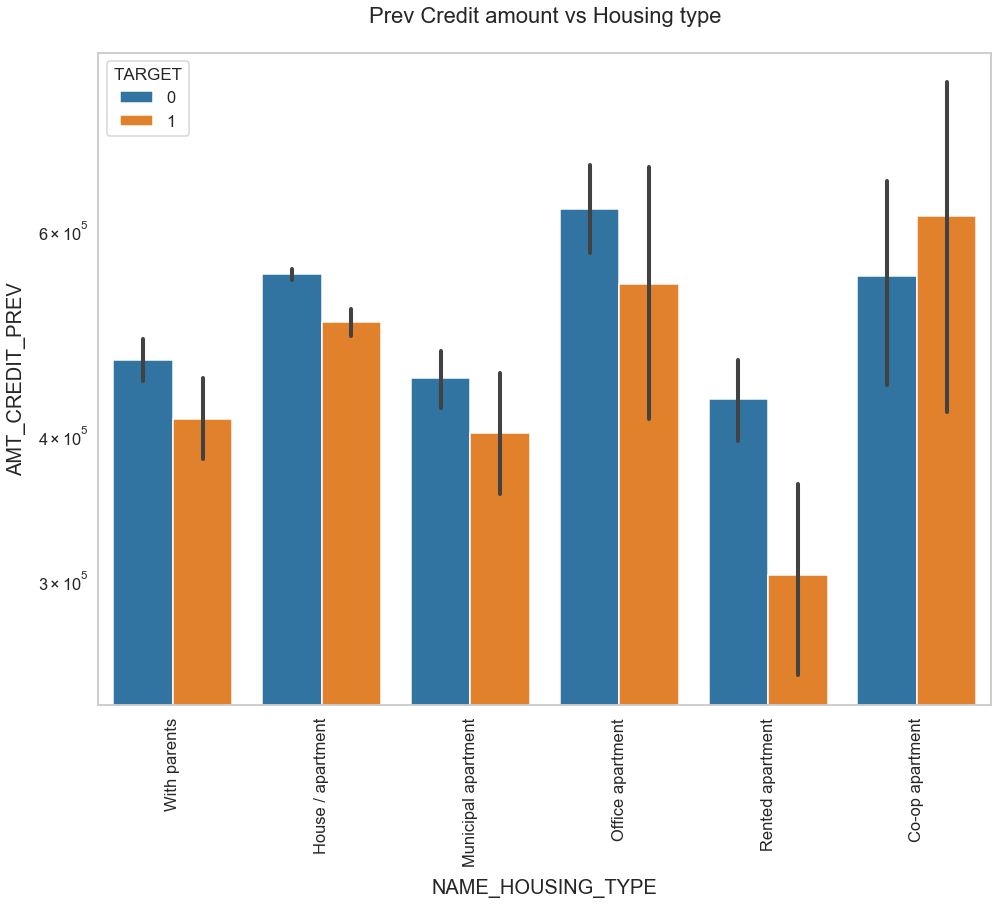

In [98]:
# Box plotting for Credit amount prev vs Housing type in logarithmic scale
plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
plt.yscale('log')
sns.barplot(data =merged_df, y='AMT_CREDIT_PREV',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type')
plt.show()

> Here Office apartment and House/apartment is having higher credit of target type 0 i.e. Client with No payment difficulties.
While Co-op apartment have high credit of target type 1 i.e. Client with payment difficulties.

> So, Bank should avoid giving loans to housing of Co-op apartments and focus more on Office apartment and House/apartment types of housing.

**RECOMMENDATION TO BANK**
1. Banks should focus more on contract type ‘Student’ ,’pensioner’ and ‘Businessman’ with housing ‘type an d should avoid ‘Co-op apartment’ housing type for successful payments.

2. Banks should focus less on income type ‘Working’ as they are having most number of unsuccessful payments.

3. Also with loan purpose ‘Repair’ is having higher number of unsuccessful payments on time.

4. Get as much as clients from housing type ‘With parents’ as they are having least number of unsuccessful payments.